In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [372]:
RIPA_factors = 'ORI number\nDate, time, and duration of the stop\nLocation of stop\nPerceived race or ethnicity of person stopped\nPerceived gender of person stopped\nPerson stopped perceived to be LGBT\nPerceived age of person stopped\nPerson stopped has limited or no English fluency\nPerceived or known disability or person stopped\nReason for stop\nStop made in response to a call for service\nActions taken by officer during stop\nResults of stop\nOfficer’s Identification (ID) Number\nOfficer’s years of experience\nType of assignment of officer'
RIPA_cols_to_keep = RIPA_factors.splitlines()

In [373]:
RIPA_cols_to_keep

['ORI number',
 'Date, time, and duration of the stop',
 'Location of stop',
 'Perceived race or ethnicity of person stopped',
 'Perceived gender of person stopped',
 'Person stopped perceived to be LGBT',
 'Perceived age of person stopped',
 'Person stopped has limited or no English fluency',
 'Perceived or known disability or person stopped',
 'Reason for stop',
 'Stop made in response to a call for service',
 'Actions taken by officer during stop',
 'Results of stop',
 'Officer’s Identification (ID) Number',
 'Officer’s years of experience',
 'Type of assignment of officer']

# WAVE 1

In [345]:
ls

LAPD/
Riverside County Sheriff's Dpt/
SDPD/
SFPD SDCS (Stop Data Collection System data) /
San Diego County Sheriff/


In [473]:
cd /Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 1/LAPD

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 1/LAPD


In [475]:
ls

LAPD-AB953-2018.csv  LAPD-AB953-2020.csv  dictionary.xlsx
LAPD-AB953-2019.csv  LAPD-AB953-2021.csv  ~$dictionary.xlsx


## LAPD

In [476]:
la18 = pd.read_csv('LAPD-AB953-2018.csv')
la19 = pd.read_csv('LAPD-AB953-2019.csv')
la20 = pd.read_csv('LAPD-AB953-2020.csv')
la21 = pd.read_csv('LAPD-AB953-2021.csv')

In [507]:
# la18.loc['Willowbrook']
la18['City'].value_counts()[:60]

Los Angeles            224877
Van Nuys                11295
Venice                   6283
Valley Glen              5626
Wilmington               5588
San Pedro                5099
Northridge               5083
Pacoima                  4811
Panorama City            4446
Reseda                   4362
Canoga Park              4175
North Hollywood          3917
Sherman Oaks             3786
North Hills              3596
Valley Village           3389
Hollywood                3196
Sun Valley               3169
Woodland Hills           2873
Sylmar                   2839
Encino                   2742
West Hollywood           2196
West Los Angeles         2008
Granada Hills            1806
Winnetka                 1712
Tarzana                  1706
Studio City              1656
Chatsworth               1646
Harbor City              1366
Mission Hills            1343
Culver City               978
Marina Del Rey            962
Gardena                   911
Sunland                   888
West Hills

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
LAPD = pd.merge(la1,la2,how='outer')
LAPD = pd.merge(LAPD,la3,how='outer')
LAPD = pd.merge(LAPD,la4,how='outer')
LAPD.head()

In [97]:
LAPD.to_csv('/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/ALL/ALL-LAPD-AB953.csv',index=False)

In [93]:
ls

LAPD-AB953-2018.csv  LAPD-AB953-2021.csv  LAPD-AB953-ALL.scv
LAPD-AB953-2019.csv  LAPD-AB953-ALL
LAPD-AB953-2020.csv  LAPD-AB953-ALL.csv


In [101]:
LAPD.columns

Index(['idx', 'Agency', 'Seq', 'txType', 'NFIA', 'StopDate', 'StopTime',
       'Duration', 'SvcCall', 'Officer', 'Experience', 'AsgntType',
       'Assignment', 'Proxy', 'Addr', 'City', 'K12', 'SchoolCode', 'pid',
       'race', 'sex', 'nonConf', 'lgbt', 'age', 'noEngl', 'disab', 'student',
       'reason', 'rsnDsc', 'tpMvViol', 'mvCJIS', 'eduCode', 'eduSub',
       'suspCJIS', 'suspBase', 'act', 'srchBase', 'srchDsc', 'szrBase',
       'propSzd', 'evid', 'res', 'warnCJIS', 'citCJIS', 'infCJIS', 'arrCJIS'],
      dtype='object')

In [169]:
LAPD[''].unique()

array([nan])

In [130]:
LAPD['Experience'].unique()

array([0])

In [151]:
import numpy as np
import matplotlib.pyplot as plt

                             infraction  count   ln count
0         65000 ZZ LOCAL ORDINANCE VIOL  11635  13.506184
1     25620 BP POSS OPEN ALCOHOL:PUBLIC   6507  12.667777
2         65000 AA LOCAL ORDINANCE VIOL   3082  11.589651
3                647(B) PC PROSTITUTION   2177  11.088126
4  11364(A) HS POSS UNLAW PARAPHERNALIA   1954  10.932215


<BarContainer object of 10 artists>

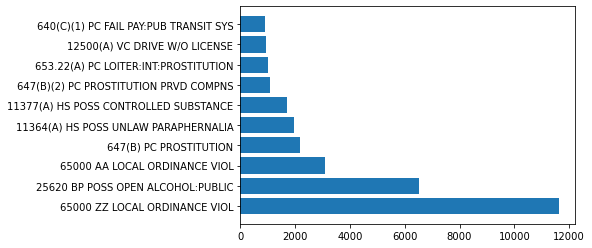

In [218]:
lapd_infraction_counts = LAPD['infCJIS'].value_counts().rename_axis('infraction').reset_index(name='count')
lapd_infraction_counts['ln count'] = np.log2(lapd_infraction_counts['count'])
lapd_infraction_counts_barh = lapd_infraction_counts.iloc[:10,:]
print(lapd_infraction_counts_barh.head())

fig, ax = plt.subplots()

ax.barh(lapd_infraction_counts_barh['infraction'],lapd_infraction_counts_barh['count'])
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')

### WRITING NOTE: 

I imagine many of these have 'local ordinances' that are vague infractions/reasons for stop

In [142]:
lapddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlAAAAD4CAYAAAAjMtjvAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAABTe0lEQVR4nO3debxVVf3/8ddbDBQHnBXBvIiAigMgOaJpaKE5kZaQJjZ8zW9mxferqWl9bXZKzPmrpmZfx5ynzH6pOZF6RWZQQUhBnA0HcAA+vz/WZ8tic8695zDde+XzfDzuw7PXXuPep86HtdY+R2ZGCCGEEEKo3Sot3YEQQgghhLYmAqgQQgghhDpFABVCCCGEUKcIoEIIIYQQ6hQBVAghhBBCnVZt6Q6EEJbcBhtsYA0NDS3djRBCaFOefvrpN8xsw6WpIwKoENqwhoYGGhsbW7obIYTQpkj619LWEUt4IYQQQgh1igAqhBBCCKFOEUCFEEIIIdQpAqgQQgghhDpFABVCCCGEUKcIoEIIIYQQ6hQBVAghhBBCnSKACiGEEEKoU3yRZght2LiZs2k4+Z7l2sb0M768XOsPIYS2KGagQgghhBDqFAFUCCGEEEKdIoAKIYQQQqhTBFAhhBBCCHWKACqEEEIIoU6tNoCStI6kmyVNljRJ0q6l8ydIMkkbZGmnSJoi6VlJX8rSJekBSWv78SaSbpA0VdJESfdK6ilpQ0n3ldrpK+kKf72VpJGSPpR0QpanvaSHJVV8qlHSfEmjJY2X9GdJHZvqRxPli78GTx8u6QNJnbK8e0m6218fLenCZq7zQ369xkh6TFKv7Nwdkkb6640kTZO0SXb+YkknZ8dHS3rd+zhR0n94+un59fK06cW9y8Y3RtIoSbuV8q6fjf0VSTOz4/al63uXpHVK5cdIur6UdrXX08GPN5A03V+vIul8r2+cpKckdcv6vXFT/Sm18y2vY6zXd7CkYyTdmOVZ298D3STtIukJr2uSpNObun8hhBBaRqsNoIDfA/eZ2VbADsCk4oSkzYB9gReztG2AIUBvYBBwsaR2fnp/YIyZvSNJwG3AQ2bW3cy2AX4CbGxmrwOzJO2e9eMnwAX++i3gB8A5eUfN7CPg78DhVcYy18z6mNm2wEfAsU31o4nyxd90Tx8KPAUMrtJurY4wsx2APwJnQwpggX7AOpK6mdlrwJn42CX1AwYAvyvVdaOZ9QH2An4jqdJ4yorx7QCcAvw2P2lmbxZjBy4FRmTX4iMWvb5vAccVZSVtTXqf7ylpjVK784FvVejP4cCmwPZmth3p+v47L9dMf4q2uwKnAgPMbHtgF2AscDnQVdI+nvUXwJVmNo10D47xurcFbmr26oUQQljhWmUApTRTtCfwB0gBipn9O8syAvgxYFnawcANZvahfxBNAXbyc0cAd/jrvYGPzezSoqCZjTazR/zwds+PpLVIH6JjPN9rZvYU8HGFbn9SrhmPAFvW0I8mSeoOrAmcRgqkloWHvW8AhwJ3ATeQAlOAy4DukvYGLgS+b2aVrgUecE0FNq+zD2sDb9dZJjcS6JIdfx34E3A/cFAp73nA8Aozh52BWWa2AMDMZpjZkvRpI+Bd4D2v5z0zm2ZmBvwncJ6k/sBAPHD1MrM8/3wzm1iu1GewGiU1zp8zewm6FUIIYWm1ygAK2AJ4HbhK0jOSrihmDyQdBMwsgppMF+Cl7HgGCz9Idwee9tfbZq8raQT28Nf9gfE19nk88LmmMvgH9X7AuBr6kVs9WyK6zdOGAteTArJekjaqsa6mHOh9y+u/3l/jAcV/ArcAz5nZw5KOlXRsuSJJW5Du45Qa2i3GNxm4AvjlknTeZxwHAndmyYcDN+bjyLwIPAp8o5R+E3Cg9+l3kvouSX+AMcCrwDRJV0k6sDhhZmOBv5JmLn+QzVyNAJ6VdJuk70parVypmV1mZv3NrH+7jp3Kp0MIIawArTWAWpW0fHSJmfUF3gdOVto7dCrwswplVCGtmKFaz8zerbHt10jLN5BmIl6vpZCZzQc+8lmrstUljSYFZy/iM2t1yJfwiuW6IaQZtwXArcBX66wzd633b3fgBF922xJ41MyeA+ZJ2hbSLBkpWLzYjy/NZ9GAw72u64HvmtlbLDpTmCvSi/FtRVp+vcaXOGtVXN83gfWAvwFI+hzwupn9ixSo9JO0bqnsb4ATyf63YGYzgF6k5cQFwN8lDayjP0U98308hwHPASNKe5ouIv1j4MGszC9Igfv9pNmzRfbkhRBCaB1aawA1A5hhZk/48c2kgKo70A0Y4xt+uwKjlDY2zwA2y+roCrzsr+dJKsY6AdixibZXA+b667l+XKsOwAcV0vMA6HifbWiuH1VJ2h7oAfzNr8MQlm4Z7wjv2yFm9hJp1mZd0szJdKCBhct4kIKKBVXqutHr2tnMitmyN72+3Fosuq8IADMbCWwAbFhH/+f6nqHNgfYs3AM1FNjKxzCVtDx4aKm9KcBo4Gul9A/N7C9mdiIpyDqkjv7k9ZiZPWlmvyVdw7z9itfRzKaa2SWk2bQdJK2/JG2HEEJYflplAGVmrwAvaeETYQOBiWY2zsw2MrMGM2sgBU39PP+dwBBJHfyJqR7Ak17+WdJyEsADQAf5E2KQZiokfd4Pe7Jw2W4SC/cENck/5F6vtieogub60ZShwOnFdTCzTYEukurdb9RU/YOy67wjiwZQ9XoYOKiYnZP0FdKm/vnljJK2AtqRgq66mNls0ib/E/zpuq+S9rAV4ziYyoHmr4H8qcp+kjb116sA2wP/qrc/kjb1zfaFPs3VI+nL2exbD9JG93/X23YIIYTlqzX/mPDxpKWl9sALwDebymxmEyTdBEwE5gHHZR/Q95CeCptiZiZpMGkD78mkGaPpwI88796eHzObLKmTpLXM7F2f6WokzWQskPQjYBsze8fL3Vvr4GroR1OGkPZS5W7z9CdK6UdLOiQ73sWXqCpS+oqEzwL/zPo6TdI7knbOZgWL/Md6nkupwszGKn2dwqOSjLRM+p0sS7EEB2kpdlil4KoWZvaMpDGkGaWZZjYzO/0wsI2kzqUyEySNIs1yQtrIfbkHYZAC8Sa/DqKKzwDneDD2AWk5eLH9YiXfIC31zSG9j49Y0msRQghh+VF6IOjTzT8wrzGzfWvI+zBwcPHUlaThwLtmdkUz5W4FTjGzZ5dFn0OoRYfOPazzsPOWaxvTz/jycq0/hBBWNElPm1n/pamjVS7hLWtmNos0o7B2U/kkbQicW3pk/RLgw2bKtQduj+AphBBCWDmsFDNQIXxa9e/f3xobG1u6GyGE0KbEDFQIIYQQQguIACqEEEIIoU4RQIUQQggh1Kk1f41BCKEZ42bOpuHke5Z7O/EkXgghLCpmoEIIIYQQ6hQBVAghhBBCnSKACiGEEEKoUwRQIYQQQgh1igAqhBBCCKFOEUCVSLpS0muSxpfSz5Y0WdJYSbdJWsfTGyTNlTTa/y7NyuwoaZykKZLOlyRP7yDpRk9/wn/AtyjTWdLdpbZ/L2mmpFWytAMk/bxC/xskzcjzevpoSTv566MkjZc0QdJESSdUqOd0b3O0pOcl3Sppm+z8Q5KelTRG0lOS+mTnpkvawPN8qVTvjyRdXOG6jZZ0VCnvwZJuz45PkTQlOz5Q0p2l80f462P8fk2W9KSkAeUxer6rJR1W4RqOz453kvSwj3eypCskdZR0tKTXS2PYxsubpOOzOi6UdLS/3sXv+2hJkySd7ukV66vU7xBCCC0rAqjFXQ0MqpD+N2BbM9seeA44JTs31cz6+N+xWfolwDFAD/8r6v028LaZbQmMAM7MyvwXcHlx4IHQYOAlYM8s3z3AQZI65p00s+med4+sjq2AtczsSUn7AT8CvmhmvYF+wOwq12KEj6kHcCPwgP9eYOEIM9sBuBg4u0L564EhpbQhng6LXrc+ZnZNKe/jwK7Z8a7AO5I28uPdgMey818E7pd0APBdYICZbQUcC1wnaZMq46xK0sbAn4GTzKwXsDVwH7CWZ7mxNIaJnv4a8EP/ncSyPwLHmFkfYFvgpuxctfpCCCG0IhFAlZjZw8BbFdLvN7N5fvhPoGtT9UjqDKxtZiMt/eDgNcAhfvpg0ocowM3AwGJ2CjiU9AFd2BsYTwrGhmb9MeAh4IAKzZcDlzxoOQU4wcxe9no+MLPLaYaZ3QjcD3y9wumRQJcK6TcDB0jqAGlmB9gUeLS59rzN14HZkrb0pC7ALaTACf/v41732kB7L3MScKKZveH1jCJd7+NqabfkOOCPZjbS6zIzu9nMXm2m3OvA34FhFc5tBMzy+ubXGyT57FqjpMb5c6rFviGEEJanCKCWzLeAv2TH3SQ9I+kfkoqZny7AjCzPDBYGGV1Is0R4UDYbWF9SN9LM1IdZuaGk4Oc2UjDymexcI9lMU+Ym4BBJxRelHg7c4K+3BZ6ueaSLGgVsVSF9EHB7OdHM3gSeZOHM2xDSDEvxC9bdS8tVlcbyOLCbpF7A86TgdTcf2/bAU55vH1LAAtCbxcfY6On1au56HV4aw+rZuTOA/5bUrlRmBPCs0lLwdyWtVmN9AJjZZWbW38z6t+vYaQmGFEIIYWnFN5HXSdKpwDzgWk+aBXzWzN6UtCNwu6TegCoULwKHauc6k2YuirbaA/sDw83sXUlPkJapiq+efo00o7NoRWavSJpAmtl6FfjYzMaX8y2Bcr+vlbQG0I60FFhJMRt2h//3W9m5qb6M1ZTHSDNN7UgzXU8CPwP6As+a2QeebxBwVTN9tybOL6kbzez7izTkk4lmNk3Sk5Rm7czsF5KuJd3Lr5OC5L2q1RdCCKH1iRmoOkgaRloyO6KYRTGzD32mBTN7GpgK9CTNOOXLfF2Bl/31DGAzr3NVoBNp2XAukM9GDPJz4yRNBwaQLeN53rlVulsELvnyHcAEYMdax1zSF5iUHR8BdAOuAy6qUuZ2UiDXD1jdl9Pq8TgpgNoNGGlm75LGvReL7n/aiRRcAUxk8TH28/R6Lc31AvgNaUlxkf+tmdlUM7sEGAjsIGn9pWgjhBDCChYBVI0kDSJ9EB5kZnOy9A2LJRpJW5A2i79gZrOAd/2JKwFHkWZhAO5k4d6Yw4AHPCB7DmjImh0KfMfMGsysgRSsfDHbON6TtD+qkltIs1f58h3Ab4Gzig3VSk8E/qCG8R9KmjHJgzHM7GPgNGAXSVuXy5nZe6S9WleWy9ZoImmWbQ/gGU8bTdoYXux/6g1MNrP5fv4s4MwiKFF6QvBo0mb3el0IDJO0c5Eg6chaN6Sb2WQfwyd71SR9Odvz1gOYD/x7CfoWQgihhUQAVSLpetJSUS+lrwP4tp+6kPTk1d+06NcV7AmMlTSGtGn6WDMrNqH/J3AFMIU0M1Xsm/oDac/TFNJTdycDmNn7wFRJW3qQ9CUWLtcV5x8FDvSkvfPzOTP7N2m/0KtmNi1Lv5c0W/T/fJnvaaov5Q73sT4PHAl8wTdpl9uaC/wOWOzrENz1wA4sGsjB4nugFgvkPLB8AnjDgzVI92cLPIAC9iPbeG9md5ICtsclTSY91XikB7WV/K/f6xmSRpbaf5U0i3eO0tcYTCIFc+94lvKepd1Y3K9ZdDbyG6Q9UKOBP5FmNIvgr5b6QgghtDAt3M8bWgNJg4Edzey0ZvJtDFxnZgNXTM9aL0l/A45qIkD61OrQuYd1Hnbecm9n+hlfXu5thBDCiiLpaTPrvzR1xCbyVsbMbqtxP8xngf9e3v1pC8xs35buQwghhJVLBFCtkJldUUOep5rLE0IIIYTlIwKoENqw7bp0ojGW10IIYYWLTeQhhBBCCHWKACqEEEIIoU4RQIUQQggh1Cn2QIXQho2bOZuGkyt+FdhyEV9nEEIIScxAhRBCCCHUKQKoEEIIIYQ6RQAVQgghhFCnCKBCCCGEEOrU6gIoSetIulnSZEmTJO3q6adLmpn9yOr+nr5TljbGf0uuUr1ne51jJd0maR1P31fS05LG+X+/kJWRpAckrZ2lDZZkkrbK0jaUdB8VSGqQNNf7N1HSpZJW8XM9Jd0raYqP9Sb/jbty+fEV6u0q6Q5Jz0uaKun3ktr7ub0k3S3pm9m1+cjHOFrSGZKOlvR66Ydrt6nQ32skfaZC+3tJuttfHy1pgaTts/Pjva4nvK4XS+01ZHkf8h/qHSPpMUm9KqQ/JalPVqaT922q/10jqZOfW0XS+d6HcV62W1N9kTRd0sZZ2iul91vP8n1Qek+eIOmi7HrNzcocJulqSYd5/vaSzvP+Pu/3r2tWn0n6XXZ8gqTTK72vQgghtKxWF0ABvwfuM7OtgB2ASdm5EWbWx//u9bTxQH8z6wMMAv5XUqWnC/8GbGtm2wPPAad4+hvAgWa2HTAM+FNWZn9gjJm9k6UNBR4FhhQJZvY6MEvS7lXGNNX7tz2wDXCIpNWAe4BLzGxLM9sauATYsNqFKUgScCtwu5n1AHoCawK/zvOZ2VXF9QJeBvb245M9y43Z9exjZhNL/d0O6Ap8rbk+ATOAU8uJZraz1/WzUnvTS1mPMLMdgD8CZ1dIv7iU/gfgBTPrbmbdgWlA8RM4hwObAtv7fR0M/LuGvszPrtelZO834KNqAzez4zzP/vi187+bS1l/A6wF9PT7djtwq99PgA+Br0jaoFpbIYQQWodWFUApzfTsSfpwxMw+MrN/N1XGzOaY2Tw/XA2wKvnuz/L9kxQYYGbPmNnLnj4BWE1SBz8+Argj69+awO7At8kCKHe752+qr/OAx4Etga8DI83sruz8g2a22GxTBV8APjCzq7zcfGA48C1JHWsoXxOv90mgSw3Z7wZ6F7NHS+Fh0vUpG1n0Q9KWwI7AL7PzvwD6S+oOdAZmmdkCADObYWZvL2W/lorfl28Cw/264vfvQ9L9BJgHXEa6lyGEEFqxVhVAAVsArwNXSXpG0hWS1sjOf19pCe5KSesWiZJ2ljQBGAccmwVK1XwL+EuF9EOBZ8zsQz/eHXg6O38IaXbsOeAtSf2yc43AHk016h+iA72f25bqrkfvclmfJXuRysFHNYeXlvBWL/V3NWBn4D4/PkjSL6rUtQA4C/hJLQ0rLV1uWuHUgaTrUzaIFKRCmsUbXQQi8EmwN5p0bW4CDvQx/U5S31r6tJxtCbxYms2E9L7pnR1fBBxRLEdWIukYSY2SGufPmb0cuhpCCKE5rS2AWhXoR1rW6gu8DxTLTZcA3YE+wCzgk70iZvaEmfUGPgec4h/8FUk6lfQv/WtL6b2BM4HvZsnrmdm72fFQ4AZ/fYMfF14jLRtV0l3SaOAx4B4zqxS81UNUnmmrll5NeQlvrqcX/X2T9KE/FsDM7jSznzVR33XALpK6Ndewme2fzfwBXOtt7g6cUEqfAZwEXOBpTY7fzGYAvUjLtAuAv0sa2FyfmutynekV+9ZcugdY1wA/qNoRs8vMrL+Z9W/XsWqcFUIIYTlqbd9EPgOYYWZP+PHNeABlZq8WmSRdTloyWoSZTZL0Pml2p7F8XtIw4ABgoJlZlt4VuA04ysymZkXmSVrFzBZIWp+01LKtJAPaASbpx17XasBcKiv2FOUmAJ+vkr85E0izZfnY1gY2A6YC6y9hvYWpZtZHUmfgIUkHmdmdzRUys3m+CfqkJWjzCDNb7J6RlkXHAGeQZme+Qhp/3+LeQNo4TrZnzmcR/wL8RdKrpNnDvy9BvwpvAuuW0tYj7b2qxRRgc0lrlYLyfsBdpbznAaOAq5agnyGEEFaAVjUDZWavAC9l+2gGAhMB/MO8MJi0eRx/umpVf705aeZherluSYNIH+wHmdmcLH0d0mbuU8zssVKxZ0nLigCHAdeY2eZm1mBmm5E+PAf4+Z5Fn2p0HbCbpE9+G0PSIEnb1VD270BHSUd5uXakGbmr87EtLTObRQpgT2kub+ZqYB9q2AxfRz8+Bk4jzW5tbWZTgGc8rXAaMMrMpkjqVywPemC1PfCvpezDe6QHBQZ6veuRlhUfrbH8+6QN8uf6/cLvX0fggVLet0jLkN9emj6HEEJYflpVAOWOJy3bjCUt1/3G089SeiR9LLA3CzfaDgDG+PLPbcD3zOwNAN9D1d/zXUh6AupvvjfmUk//Pml/yk+zvUAb+bl7gL389VCvP3cLaTM43qeaf5TMl8sOAI73R9onAkeTlgLLekmaUfyRgrnBwFclPU96qvADatx/lCnvgdqtQp7bScHaHs3sgSrG9RFwPrBRU/ma2ANVrd65pCCxWN77NtBT6SsgppIC2CLg2Ai4S+lrB8aSlmwvrLWtJhwFnObvtQeAn5dmLJtzCuk+Pef37avA4Hw2NPM7IJ7GCyGEVkqV/787wCezXteY2b415H0YOLiln/YKK5cOnXtY52HnrbD24seEQwifBpKeNrP+zeesrjXOQLUavoR1ubIv0qxE0obAuRE8hRBCCCuH1raJvNUxs5tqyPM6Cx+xDyGEEMKnXARQIbRh23XpRGMsq4UQwgoXS3ghhBBCCHWKACqEEEIIoU4RQIUQQggh1Cn2QIXQho2bOZuGk2v++rFlJr7OIISwsosZqBBCCCGEOkUAFUIIIYRQpwigQgghhBDqFAFUCCGEEEKdllkAJWkdSTdLmixpkqRdS+dPkGSSNvDjI0o/ZLtAUh8/J0kPFD+hImm+5xkjaVTxo7eSNpR0X6mdvpKuyNoY63+PS9rB09tLelhSxU30WXvjJf1ZUkdP30TSDZKmSproP4jbs47yefpdktbJyvT2MT/nPy78U0nycxtLutvHX7S7XXbt3pI0zV//P0kN3saXsjzvSXrWX18j6WhJF5b6/ZCk/pKe8HwvSno9q6NB0vTsHnaVdIf3d6qk30tq7+f28vt9YFb/3ZL2qnC9rs76P6p475TSx0gaKGkNSW9K6lSq43ZJX/NxvS7pGe/XX1X5R5KLckf5tZrg1/YET5ek07yO5yQ9KKl3Vm66pEdKdY1W+gHjYvyzvR+TJP1PLddF0gFeprjX363W9xBCCC1nWc5A/R64z8y2AnYAJhUnJG0G7Au8WKSZ2bVm1sfM+gDfAKab2Wg/vT8wxsze8eO5nncH0i/a/9breB2YJWn3rB8/AS7w19OAz5vZ9sAvgcu83EfA34HDq4ylaG9b4CPgWA9mbgMeMrPuZraNt7VxLeUrpL8FHOfXZ3XgTuAMM+vp12834Hte7hfA38xsB2/3ZDMbl12/O4ET/Xif7Br/NcvTCBzhx0dVGXdRbmcv8zPgxqIOM5te5PHrcStwu5n1AHoCawK/zqqaAZzaVFuZE73Nk4H/rZD+I+BSM3sfuB84JOtLJ2AAcLcn3Whmfb1fZwC3Stq63KCk/bzeL5pZb6AfMNtPH0e6Bzv4PfktcKek1bIq1vL3NpXqBx4xs75Af+BISTt6esXrIukzpPfogf5e7ws8VKHeEEIILWyZBFBKM0V7An+AFKCY2b+zLCOAHwNWpYqhwPXZ8RHAHVXyrg3kP9p7u+dH0lrA9mY2xvvxePYDv/8EulYq14xHgC2BvYGPzezS4oSZjTazR6qWXLR82Uigi7/+OvCYmd3v9c4Bvk8KJgA6kz50i3bH1tDv5e0LwAdmdhWAmc0HhgPfks+4AWOA2ZL2raPeh2n+el0PDMnODSYF73PKhczsQVJQckyFOk8BTjCzlz3vB2Z2uZ87CTi+qNPvzeMs+p65iYVBePk9nPfhfeBpoLsnVbsua5G+WuRNL/ehmT1bqc4QQggta1nNQG0BvA5c5csPV0haA0DSQcDMIqip4nAW/fDZnfSBU1jdl0cmA1eQZpMKjcAe/ro/ML5KG98G/pIdjwc+19SglJb49gPGAduW+tSsUvk8vR0wkDRzBNC7XLeZTQXW9OD0IuAPvox0qqRN6+nHclKpz++QZhnzAOhXwGl11HsgpevlBrHwB5vvA3aUtL4fD6FK8OJGAVtVSK94T/2ar+H3INdIGnfhZuArWb/vqtS493MXYEKWvNh1MbO3SO+Jf0m6XmkJerH/jUo6RlKjpMb5c2aXT4cQQlgBllUAtSpp+eMSX7J4HzjZZyJOJS0FVSRpZ2COmeWBz3pm9m52XCx9bUX6IL3Gl5AAXgOKgKIzKZArt7E3KYA6qUjzGZOPfNaqbHVJo0kfmC/iM2t1qFa+SH8TWA/4W9FFqs/OmZn9lRSkXk4KBJ6RtGGdfVqs3jrTy6r1eZH0YoZO0h4V8ubO9mtzDOle5ekvAP8H/Mbr/IgUaBymtB+rD2lZr6m+LgvlMb8FvC1pCGnJujwDtoekZ7xvZ5jZJwFUtetiZt8hBddPAicAV5Y7YWaXmVl/M+vfrmOn8ukQQggrwLIKoGYAM8zsCT++mRRQdQe6AWMkTSctoY2StElWttLswbxK//IGMLORwAZAEUCsBsz113P9+BOStifNWh1sZm+WqusAfFChmSJg62Nmx/sH9gRgxwp5K6lU/pN0YHOgPb4HyuvuX+r3FsB7RSBpZm+Z2XVm9g3gKdKS6dJ4E1i3lLYe8EaN5Sv1eW1gM6A8c/Nrmt8LVezh2rcUTJ9ImtE6Dfhjll4s4x0G3GFmHzdRd1+yPXmlMSx2T30m7X2/B7l+wMRS2o2kGcJKM2CP+F6sHfOl30zF6+L720aQ9g0eWqFcCCGEFrZMAigzewV4SVIvTxoITPQPgo3MrMHMGkiBVj/PjwdJXwVuKFX5LGnGZTGStgLa4ftESJuXiw/cSWTLR5I+S9ro/A0ze65Uz/rA68188OYeADpI+o+sjs9J+nyN5T9hZrOBHwAn+Mbha4EBkvbxelcHzgfO8uMvaOGTfGuRAtMXK9Vdh6eA3YtgVlJ/UkD5Uo3l/w50lHSUl28H/A64urwXyfcPrUvaHF83M1tAekhhFUlf8uQHgR6kILTq8p3fn2NIs3dlvwXOyq5BB0k/8HNnA+f7vcDvzQDgulIdt5Hu01+XYFyLXBdJaxZP47k+wL/qrTeEEMLytyx/C+944Fqlx9hfAL5ZQ5k9STNXL5TS7wH2Aqb4cbH0BWkZZZgvwUHa3H0PgJlNltRJ0lo+c/MzYH3gYl/xm2dm/bNy99Y6ODMzSYOB8ySdTJq5mk56iqtuZvaMpDHAEDP7k6SDgQskXUQKEP8EFF8zsCNwoaR5pKD3CjN7aknazdp/VdIPgXs9kH0PGOrBSi3li+txsaSfer/uJT2ZWMmvqf5gQK3t/Yr0MMJfzWyBpFtIAfjDpeyHSxoAdCQ9iXmomS02A2Vm90raGPh/viRsLFwyu4AU3IyTNB94hTSLObdUx7vAmQALV5Xrkl8XAT+W9L+k2dT3gaOXpNIQQgjLl8xq3fKy4kjqDFxjZs0+vSXpYdIH29t+PBx418yuaKbcrcAp8ZRTaMs6dO5hnYedt8LbjR8TDiG0ZZKeziZUlkir/CZyM5sFXO57aqryjdTnZl9VAHAJ8GEz5dqTvr8ogqcQQggh1G1ZLuEtU2Z2Uw15Xmfho+1F2gek5a+myn0EXLM0/QshhBDCyqvVBlAhhOZt16UTjbGcFkIIK1yrXMILIYQQQmjNIoAKIYQQQqhTBFAhhBBCCHWKPVAhtGHjZs6m4eR7WrobSyS+CiGE0JbFDFQIIYQQQp0igAohhBBCqFMEUCGEEEIIdYoAKoQQQgihTs0GUJKulPSapPGl9K9KmiBpgaT+WfpOkkb73xj/wVkkrZWlj5b0hqTz/NyILP05Sf/O6uss6e5S27+XNNN/BLdIO0DSz6uM4WhJF5bSHir6LelbksZJGitpvP+wb7mO073N0Z7noOzcMZIm+9+T/kO2eb+e8WsxUdJ3Pb2X92G0pEmSLqvS956S7pU0xfPd5D+Ai6QB3l7R9jGl/s6RtFGW9p6k9bNr/Uo2ptGS2kuan43xLknrZOV7S3rA79Hzkn7qP8Jb8Rp7+nRJG1S4H6+X3g/bSGqQNNev1yQf27Aq16WjpGv9vo2X9KikNb2O8nv1dEkn+OurJU3zNidL+p8s32LvA0kXed6J3reiv4d5mTskjazQ3mLXPnu9iaQbJE31eu/1+9xQamO0pKMqjT+EEELLquUpvKuBC1n8p0/GA18B/rdCen8zm6f0o8BjJN3lv1rfp8gk6WngVgAzG56lHw/0zer7L+Dy7PwqwGDgJWBP4CE/dQ/wS0lnmtmcGsZV1NcVOBXoZ2azJa0JbFgl+wgzO0fS1sAj/gG5P/BdYICZvSGpH3C7pJ2AN4HLgJ3MbIakDkCD13W+13eH92O7Cn1bzcf1X2Z2l6ftDWzogct1wCFmNsqDlL9KmmlmxWNZbwD/DZxU1Glmb+L3QdLpwHtmdk7W5lwzK87/ETgO+LWk1YE7gf80s/sldQRuAb4HXNTMZa7kRjP7fmm8DcBUM+vrx1sAt0paxcyuKpX/IfCqmW3neXsBH9fY9olmdrNf34mSrvGyi70PsvvTANxdXBtPWwfoB7wnqZuZTcvaWOzaexkBtwF/NLMhntYH2Jj0np6atxFCCKF1anYGysweBt6qkD6p0o/xmtkcM5vnh6sBVs4jqQewEfBIhSaHAtdnx4cC92XHe5OCtEs8b9GukYKpA5oe0WI2At4F3vN63it9EC7GzCYB84ANSB+QJ5rZG35uFFAEHmuRgtQ3/dyH2TXrDMzI6hxXoamvAyOL4MnzPWhm473+q709vP0fAydn5a8EDpe0Xg3XoZKRQJesL4+Z2f3e3hzg+6X2likze4EUQP+gwunOwMws77Nm1uSPSFewmv/3fZbgfUB6b94F3AAMKZ2rdu33Bj42s0uzvo82s0r/WwghhNBKLZc9UJJ2ljQBGAccmwVUhaGkGQgrldsc6AY84MfdgLdLH4xFgHUbcICkz2TnGoE9qnTr8HxpBCiWHccArwLTJF0l6cBaxgcsAF4HegNPl7I0Ar3N7C3SrM2/JF0v6QgtXHYcATwg6S+ShitbKstsW6HuQtV2s+P3SB/kP2xuTGWS2gEDvf8V2zOzqcCaktaut35K98NnuCoZBWxVIf1K4CRJIyX9yoPyWp3t74EZwA1m9hpL8D5g4XvxerJg3lW79k3dU4Dupeuy2PtZacm4UVLj/Dmza+hmCCGEZW25BFBm9oSZ9QY+B5ziSyW5ISw6y5Sn32xm8/24MylIAUBSe9KS2e1m9g7wBPDFrPxrwKZVunWjmfUp/kjBBt7WIOAw4DlghC9tVTLcP3jPAQ4vB4AZ4TNvZvYdUiDyJHAC6UMVX5LaGvgzsBfwT1/iq9UnbZSU084HhtUR5KzuY3wTWA/4WzPtVWqzFovcDzObWyWfKjZoNhrYAjjb+/mUL63W0scT/T2wCTBQ0m51vg9Q2oe2JfComT0HzJO0bSlbvdcefAkv+1tsZsrMLjOz/mbWv13HTnVUHUIIYVlZrk/h+VLX+6R/dQMgaQdgVTOr9K/wcmA1l4XLLJA+4DoB4yRNBwaw6L/8V/My9fbTzOxJM/ut9+HQKllH+IfaHtkH20Rgx1K+fp5e1D/OzEYA++Z1m9nLZnalmR1MWhIsfwBPqFB3fq5/KW3HvF1v49+kvVLfq1JPWbEHanOgPWmpsGJ7vkfpPd/ftrz0BSZVOuHLbLea2feA/yMF128C65ayrkfak7RYedKy7wA/rvV9AHC4tzPN34sNlJbxqlz7pu5pCCGENmKZB1CSukla1V9vDvQCpmdZynucinK9SB9I+RNNz7Fw03VR9jtm1mBmDaTlvi/6hmaAnqT9UfX0d1Pf+F3oA/yrjirOAs6UtL7X1wc4GrhY6amwvSrVLWlQsfwoaRNgfbI9Pe46YDdJn/zmhZfbjrRx+2hvD2//TO9P2bmkje41/3SPmc0m7T06wft5LTBA0j7e3uqkGZZK7S0TvnH7HOCCCud2l7Suv24PbAP8y4OiWZIG+rn1SIH3oxXqWBXYGZi6BO+DocCg7L24I4vvg4LFr/0DQAdJ/5H143OSPt9EWyGEEFqZWr7G4HpSUNNL0gxJ3/b0wZJmALsC90j6qxcZQHrybjRpn9L3ig3W7mtUXr4bStqP8slSi5m9T/pw29KDpC+RnkrLzz8KFPtV9s7P1+gzwDlKj7SPJs0s1LxnyMzuJC3LPS5pMumJwSPNbBZp+enHkp71un9OCq4gLT2OlzQG+CtpWemVUt1zSZvij1f62oCJXv41r/9I4HJv93HgynzDeVbPG6R7Uc8SIWb2DGlv0BDvy8HAaZKeJe1ve4r0hGbhaH+PFH9dPX1slnaup5X3QO3m6d3lX2MA3ARcUOEJPIDuwD8kjQOeIS3J3uLnjvJ+jiYFLD/3/VqFYg/UWB/HrdTxPvDA7rPAP7NrNQ14x/fH5ddwkWvv7+/BwL5KX2MwATgdeDkbf35dKm2gDyGE0MJUfRtP66D0PVI7mtlpzeTbGLjOzAaumJ6F0PI6dO5hnYed19LdWCLxY8IhhJYi6WkzK2+DqUvNSzotxcxuK5bHmvFZ0vfuhBBCCCEsV60+gAIwsytqyPPUiuhLCCGEEEKbCKBCCJVt16UTjbEUFkIIK1z8mHAIIYQQQp0igAohhBBCqFMEUCGEEEIIdYo9UCG0YeNmzqbh5Hq/+qz1i684CCG0djEDFUIIIYRQpwigQgghhBDqFAFUCCGEEEKdIoAKIYQQQqhTBFAhhBBCCHVaJgGUpCslvSZpfCn9q5ImSFogqX+WvlP2a/Nj/AeDi3PtJV0m6TlJkyUdWqrzMElWqq+zpLtL+X4vaaakVbK0AyT9vMoYjpZ0YSntoaIdSd+SNE7SWEnjJR1coY7Tvc3Rnueg7NwxPp7Jkp6UNKDUr2f8WkyU9F1P7+V9GC1pkqTLKrS5V4WxXy3psGwMjdm5/pIeqla2VM8YSddnx7dJOiQ7flbSadnxLZK+UqqjQdJcH8NESZcW90TShpI+LsablZmeXet/SNq8dP4OSSNLaRWvvaefUKH+Dfz1/Oy9OFrSydl1e9avwVOS+pTK35IdHybp6hr7uEhfPP290vFwSR9I6lTOG0IIoXVYVjNQVwODKqSPB74CPFwhvb+Z9fFy/yup+EqFU4HXzKwnsA3wj6KQpLWAHwBPlOr7L+DyLN8qwGDgJWDPLN89wEGSOtYxNiR19X4NMLPtgV2AsVWyj/BxfRW4UtIqkg4AvuvltwKOBa6TtImkzwCXAQea2Q5AX+Ahr+v8oj4z2xq4oJ5+ZzaStF89BSRtTXp/7ClpDU9+HNjNz68PvAfsmhXb1fOUTfVrsj3pnh7i6V8F/gkMrVBmb7/WDwF5kLYO0A9YR1K3UpnFrn3zI2WuX9/i74zs3BF+Ty4Gzi6V6y+pd6UKm+ljLYYCT5HewyGEEFqhZRJAmdnDwFsV0ieZ2bMV0ueY2Tw/XA2w7PS3gN96vgVm9kZ27pfAWcAHpSoPBe7LjvcmBWmXkH04m5mRPpAPqGlgC20EvEsKGDCz98xsWlMFzGwSMA/YADgJOLEYi5mNAv4IHAesRfo+rjf93IfZNesMzMjqHFdnvwtnkwUhNfo68CfgfqCYSXsMD6D8v3cDGyrpRgpGXqlWod/zx4EtPWko8N9AV0ldqhQbCeTnDgXuAm4AhlRpJ7/2y0K5DwDnAD+pkr/ZPlYjqTuwJul+VQosi9nMRkmN8+fMrqf6EEIIy0iL7YGStLOkCcA44Fgzm+f/cgf4paRRkv4saWPP3xfYzMzKy1XdgLfN7MMseShwPXAbcIDP8hQagT2qdOvwfDkHKJYJxwCvAtMkXSXpwFrGBywAXgd6A0+XsjQCvc3sLeBO4F+Srpd0RDZzMgJ4QNJffFlnHZbMSOBDSXvXUeZw4EbSdSw+yJ8GtpXUnhRAjQSeBbb248eaqtBn/gYC4yRtBmxiZk8CN3l7lQwCbs+Oi3ub96vcTn7tAYaX7uumWfbVS0t4lfpR7gPe536Stlw8e/N9bEJR9hGgl6SNyhnM7DIz629m/dt1jFW+EEJoCS0WQJnZE2bWG/gccIqk1UgzMV2Bx8ysH+kD+hwPKEaQZivKOrPwgxL/cN8fuN3M3iEt930xy/8ai36A5m7Ml3NIQQ5mNp/0IXoY8BwwQtLpVeoY7h/S5wCH+6xXJcJn3szsO6TA4kngBOBKT7+KFJz8GdgL+KekDqV6qtVfTv8VNc5CSfoc8LqZ/Qv4OylQWNeD1Amk5aldSNd2JCl42o3Ky3cA3f2aPAbcY2Z/Ic3M3OTnb2DxQONBSa8B+wDXeb82Js1ePWpmzwHzJG2blal27UeU7uvLWZnyEt6N2blrJc0gzSCWl0/nk2b2Tildu+b62JwhwA1mtgC4lbQcGUIIoZVp8afwfLnlfWBb0jLWHNLMEaTAoR9pmWtb4CFJ00kf3ncqbfCeS1oGLAwCOpFmOaYDA1j0w3k1L1NvP83MnjSz35I+5A6tkrX4sN7DzB7xtInAjqV8/Ty9qH+cmY0A9s3rNrOXzexKMzuYtCxV/jB+E1i3lLYekC99YmYPkMa+SzNDhXS9tvLrNxVYO+vT46R9ZWuZ2dukPUxFAFVtBmqqX5O+ZnZ61sbR3sadwA6SemRl9gY2JwVsv/C0w32s07xcA4sukVW69kvjCKAbKYC7qML5P5GuxWeztOb6WJWk7YEewN+87BDqn8EKIYSwArRIACWpW7FpXOkJq17AdJ8xuIs02wJpVmaimc02sw3MrMHMGkgf2geZWSNpRqghq34o8J0sbzfgi9nG8Z6k/VH19HdTSf2ypD7Av+qo4izgTN94jT/RdTRwsaQ1Je1VqW5Jg4rlR0mbAOsDM0t1Pw9s6pu+i+u5AzC6Qj9+Dfy4qY76bN9Xge2za3gwCz/IHyNtiB/jx2NJQdlnScFOsyT1AtYwsy5ZG0Vg+gkzmwv8CDhK0nreh0FZmR3LZZY1M/uYNHO3S3GNS+dGeB8LS9PHocDpRVkz2xTootJTiCGEEFresvoag+tJSzm9JM2Q9G1PH+xLILsC90j6qxcZAIzx5ZbbgO9lm8VPAk6XNBb4BpWX7T5hZu8DUyVt6UHSl0hP2+XnHwWKfUt75+dr9BnSUuJk7/PhwA9rLWxmd5KW5R6XNJn0xOCRZjaLtJT3Y6VH5kcDPycFV5CWHsdLGgP8lbQR/ZVS3R8CRwJXefmbSQHkYruLzexesuVON9Dv2YxsuWqmmeWB2sPANpI6k2agtiDd72Jj+GtAoy871WIoC2cZC7dQYbbFr9H1pA33nyUFz8W5acA7vudpSZX3QJ1RzuCB3O9Iy6tlf8B/lFtSQw19PK10vXNDWPy63MZyDhJDCCHUT9W36LQdSt8jtaOZNbnHx/enXGdmA1dMz0JYvjp07mGdh53X0t1Y5qaf8eWW7kII4VNM0tNm1r/5nNWt2nyW1s/MbiuWx5rxWZqZ0QohhBBCaM6nYgYqhJVV//79rbGxsfmMIYQQPrEsZqBa/Cm8EEIIIYS2JgKoEEIIIYQ6RQAVQgghhFCnT8Um8hBWVuNmzqbh5Hq/laPtiqfzQgitRcxAhRBCCCHUKQKoEEIIIYQ6RQAVQgghhFCnCKBCCCGEEOoUAVQIIYQQQp0igGpjJK0j6Wb/YeNJknYtnT9BkknawI+PKP1Y7gJJffycJD0gaW0/nu95xkgaJWk3T99Q0n1V+tMgaa6XmyjpUkmr+Lmeku6VNMX7epP/HmGz5SukXyPpM1m5AZKe9OswWdIx2blekh7yspMkXSbpS9k1eK/48Wavdy9Jd0v6ZpbnI0njih8YlnS6pBNKfZ8uaeOszCuSZmbH7SW9l+Xv7df7OUnPS/qpJPm5o/3ebJ/lH+8/UBxCCKGViQCq7fk9cJ+ZbQXsAEwqTkjaDNgXeLFIM7NrzayPmfUBvgFMN7PRfnp/YIyZvePHcz3vDsApwG+9jteBWZJ2r9KnqV7/9sA2wCGSVgPuAS4xsy3NbGvgEmDDWsqX0rcDugJf83FuAlwHHOvXYQDwXUnFM+7nAyN8LFsDF5jZX7Pr0Agc4cdHZdfqqizPy8DefnxylXEDzM/KXJq128fMPioySVoduBM4w8x6ku7dbsD3srpmAKc20VYIIYRWIgKoNsRnivYE/gBgZh+Z2b+zLCOAHwPVfuBwKHB9dnwEcEeVvGsDb2fHt3v+qsxsHvA4sCXwdWCkmd2VnX/QzMbXWD5Pnw88CXTxpOOAq81slJ9/gzTuItDpTApGivLjmur3CvJ14DEzux/AzOYA32dhnwHuBnpL6tVURZKOkdQoqXH+nNnLrcMhhBCqiwCqbdkCeB24StIzkq6QtAaApIOAmWY2ponyh7NoALU78HR2vLovPU0GrgB+mZ1rBPZoqnOSOgIDgXHAtqW6m1Uqn6evBuwMFMuIvSvU3ejpkALJByT9RdJwSevU04/lZLE+m9lUYM1iCRVYAJwF/KSpiszsMjPrb2b923XstFw6G0IIoWkRQLUtqwL9SMtifYH3gZM98DgV+Fm1gpJ2BuaUZoDWM7N3s+NiCW8rYBBwTbFHB3gN2LRK9d0ljQYeA+4xs7/UOa5q5Yv0N4EXzWxsMRwqz7IZpKU4YGvgz8BewD8ldaizTxXrriO9rFqfy3VcB+wiqVutHQshhLDiRQDVtswAZpjZE358Mymg6g50A8ZImk7aLzTK9woVhrDo7BPAvGLDd5mZjQQ2YOGepdWAuVX6NdUDr75mdrqnTQB2rHFclcp/kk5a0tvFZ9mKuvuX6tgRmJj1/2Uzu9LMDgbmkWbElsabwLqltLWAf9dYfrE+S9oCeC8PYn0Z83fASUvc0xBCCMtdBFBtiJm9AryU7ZEZCEw0s3FmtpGZNZhZAynQ6uf58SDpq8ANpSqfJS0LLkbSVkA7UuAA0BOoun+pguuA3bKN3UgaJGm7OuoAwMxmkfYKneJJFwFHa+HThOsDZ5KWv4p2PuOvNwHWB2bW227Jw8BBktbyer9C2oA/v8by1wIDJO3j5VcnbXY/q0Leq4F9qLzhPoQQQisQPybc9hwPXCupPfAC8M0ayuxJmrl6oZR+D2mJa4ofr+5LZpCWnIZlAcLenr8mZjZX0gHAeZLOAz4GxgI/rLWOktuB0yXtYWaPSDoSuNwDGgHnZRvWvwj8XtIHfnxiEUwuKTMbK+lC4FFJRlrS/E4d5edKOhi4QNJFpOD0T8CFFfJ+JOl80hOXIYQQWiGZ1bqFI3zaSOoMXGNm+9aQ92HgYDN7u7m8YcXp0LmHdR52Xkt3Y4WZfsaXm88UQgjNkPS0mZW3gtQllvBWYr40dnn2FFhFkjYEzo3gKYQQQkhiBiqENqx///7W2NjY0t0IIYQ2JWagQgghhBBaQARQIYQQQgh1igAqhBBCCKFO8TUGIbRh42bOpuHkmr9dItQgnvQLIdQiZqBCCCGEEOoUAVQIIYQQQp0igAohhBBCqFMEUCGEEEIIdVopAyhJ60i6WdJkSZMk7erpp0uaKWm0/+2flTlF0hRJz0r6Upa+o6Rxfu58SfL0DpJu9PQnJDU00Z/Bksx/wLd8rq+f+1Klsp5nuqQNSmntJZ0naaqk5yXdIalrdn4TSTf4+YmS7pXUMzs/XNIHkjplaXtJuruJS4uS07zN5yQ9KKl3qa/jJI2V9A9Jm2fn5vt1nyBpjKT/8h9CXqRtSUdLWiBp+6zs+PwaV7tunva77PgESadnx0d5XRP8upzg6VdLmpa9Nx4v1buGpDfz6+Xpt0v6mvf5wiz9GH//TZb0pKQB2bmHJC3VF7yFEEJYvlbKAIr0I633mdlWwA7ApOzcCDPr43/3AkjaBhgC9AYGARdLauf5LwGOAXr43yBP/zbwtpltCYwAzmyiP0OBR72NaueG1jnG3wBrAT3NrAfpx3hv9QBHwG3AQ2bW3cy2AX4CbFxq9ylgcJ3tHgfsBuxgZj2B3wJ3Sloty7O3mW0PPASclqXP9eveG9gX2B/4nyrtzABObaIf1a7bh8BXygEngKT9gB8BX/Q+9ANmZ1lOzN4bu+Vlzex94H7gkKy+TsAAYJGgU+lHlr8LDPD34LHAdZI2aWI8IYQQWpGVLoBS+t23PYE/AJjZR2b272aKHQzcYGYfmtk0YAqwk9KP8a5tZiMt/SbONSz8AD0Y+KO/vhkYWMxOlfqzJrA7KeAaUjon4DDgaOCLpSCkqTF2BL4JDDez+T7Oq0jBwxeAvYGPzezSooyZjTazR7x8d2BNUnBTb+B2EnC8mc3xeu8HHgeOqJB3JNClUiVm9hopMP1+petGCkp6S+pVPtHMdZsHXAYMr1DnKcAJZvay9+EDM7u8Uv+quJ5F7+FgUqA+p5TvJFIw9oa3M4r0XjmujrZCCCG0oJUugAK2AF4HrpL0jKQrJK2Rnf++Ly9dKWldT+sCvJTlmeFpXfx1OX2RMmY2jzSTsX6F/hxC+pB9DnhLUr/s3O7ANDObSpqt2X/x4hVtCbxoZu+U0htJs2jbAk83UX4oKRh4BOglaaNaGvXgdA3vb6V2ywaRZsYqMrMXSO/RSu0vAM4izZyVNXfdLgKOKC+30fx1OTtbwru2wvn7gB0lFfd5COk6lvWu0E61axRCCKEVWhkDqFVJSzOXmFlf4H3gZD93CdAd6APMAoq9MpVmQKyJ9KbKlA0FbvDXN7DojE9T55qiKm1VSy8bQppxWwDcCny1xnZr7c+Dkl4D9gGuq6FsNdcBu0jqVkpv8rp5YHkN8INm2i7Ll/AWm1Ezs4+AO4HDfImwD2lZrxa13pti/1SjpMb5c2Y3XyCEEMIytzIGUDOAGWb2hB/fTAqoMLNXzWy+Bw6XAztlZTbL6ugKvOzpXSukL1JG0qpAJ+CtvCM+U/EF4ApJ04ETgcN9m1I74FDgZ37uAmA/SWvVMMYpwOYV8vYDJgITgB0rFfSN2T2Av3m7Q6gxcPPA5H1JW1Rpt7A3sLn34xfV6vN65gOvVWlvHinIPSkrU+t1O4+0bJrPPla9LnUolvEOA+4ws48r5JlYoZ3yNarKzC4zs/5m1r9dx/IkWgghhBVhpQugzOwV4KVs78xA/IPL9zQVBgPj/fWdwBClJ+u6kQKMJ81sFvCupF18381RwB1ZmWH++jDgAd8nlTsMuMbMNjezBjPbDJhG2ni8DzDGzDbzc5sDt5BtUm5ijO+T9tScW2x2l3QU0BF4wP86SPqPooykz0n6PClYOt3bbDCzTYEu+dNyzTgbOF/S6l7vPj6eRWaazGwuacP2UZLWK1ciaUPgUuDCCtctdzXpWm3oxzVdNzN7C7iJFEQVfgucVWzm9vtd7yzVg6T3x3FUXr6DtPR4ZrHUJ6kPab/WxXW2FUIIoYWsrL+FdzxwraT2wAukDdeQPjz7kJZSppOelMLMJki6iRRozQOOKzZnA/9J+hBfHfiL/0HapP4nSVNIM0/VnrA7o5R2C/B1r++2Cuf+E/hThbrGSlrgr28ibYg+B3jO0ycDg4tgRNJg4DxJJwMf+Hh/5P3cr1T3bZ7+BGkzfL7v66tmNjI7vgBYFxgnaT7wCnCwB0yLMLNZkq4nBRu/BFaXNBr4DOk6/wk4t8JY8zo+knQ+6clKSNe01uv2O+D7WV33StoY+H8eEBtwZZb/bEn5U4M7+bJd3p8Fkm4hLXs+XKXPd0rqAjwuyYB3gSM9IC/cI6mYvRppZku7jBpCCGEZUtP/uA8htGYdOvewzsPOa+lufKrEjwmH8Okn6WkzW6rv21vplvBCCCGEEJZWBFAhhBBCCHWKACqEEEIIoU4r6ybyED4VtuvSicbYsxNCCCtczECFEEIIIdQpAqgQQgghhDpFABVCCCGEUKfYAxVCGzZu5mwaTr6npbsRwlKL798KbU3MQIUQQggh1CkCqBBCCCGEOkUAFUIIIYRQpwigQgghhBDq1OoCKEmbSXpQ0iRJEyT9MDt3uqSZkkb73/7Zue0ljfQy4yStJqmjpHskTfb0M7L8HSTdKGmKpCckNVTpz3xva4ykUZJ28/QGSXP93ERJl0pa7Hpm5cdL+rOkjp7eVdIdkp6XNFXS7yW193MdJV3r4xgv6VFJa/q5U30sY73enSu0KUmned3P+fXsnZ2f7nWPkXS/pE1K6cX1Pd/Tr/br3sGPN5A0vYl7OFiSSdoqS2uQNL5K/hP8Ho33Ph3l6e0lnefX53m/Xl2zcu+V6jla0oXZ8TFe72RJT0oakJ17SFKTPyRZ6d5VGoe/L0/IrtU0LzdZ0v801aakvSTdnR3vJ6lR6f0/WdI5TfUxhBBCy2h1ARQwD/hvM9sa2AU4TtI22fkRZtbH/+4FkLQq8H/AsWbWG9gL+Njzn2NmWwF9gd0l7efp3wbeNrMtgRHAmVX6M9fb2gE4Bfhtdm6qmfUBtge2AQ5povy2wEfAsZIE3ArcbmY9gJ7AmsCvvcwPgVfNbDsv923gY0m7AgcA/cxse2Af4KUKbR4H7AbsYGY9vc93Sloty7O3j6kR+Ekpvbi+P8jS5wPfqnKNyoYCjwJDmsso6VhgX2AnH+uegPz0b4C1gJ5+nW4HbvXr11y9BwDfBQb4/T8WuK4IFmu02L2rsdyJ/r7oAwyT1K2WQpK2BS4EjvT3/7bAC3X0N4QQwgrS6gIoM5tlZqP89bvAJKBLM8W+CIw1szFe7k0zm29mc8zsQU/7CBgFFDMYBwN/9Nc3AwNr+GBeG3i7Qp/nAY8DWzZT/hHP8wXgAzO7ysvPB4YD3/IZqs7AzKz+Z83sQ09/w19jZm+Y2csV2jkJON7M5ni++71/R1TI+3AN/QY4DxjuwWpVPlO2OynoazaAIgVv3zOzd7yvs83sj34dvgkM9+uDX68PSdevOSeRApk3vOwo0v0+roaylRT3rh5FwPp+jfl/DPzazCZDel+Z2cV1thlCCGEFaHUBVE5pWa0v8ESW/H1fvrpS0rqe1hMwSX9VWmb7cYW61gEOBP7uSV3w2RsPgGYD61foxurFcgxwBfDLCnV3BAYC45oYy6rAfp6nN/B0ft4DiBdJH9JXAicpLUn+SlIPz3Y/sJkvy10s6fMV2lkbWMPMppZONXq7ZQeU+v1gtoQ3PEt/kTSr9I1qY3SHAPeZ2XPAW5L6VcsoaS1grQp9hXQdXiwCqyrjWD3r62jgF1m+xa4x1a9B0Z9NJd1bIT2/d7U42/szA7jBzF6rsdy2LN7nSv08xpf5GufPmV1j1SGEEJalVhtA+UzGLcCPsg/RS4DupKWRWcDvPH1VYABphmUAMFjSwKyuVYHrgfPNrFgSqTTbZBXSimWcrYBBwDXZTFV3/6B8DLjHzP5SofzqnqeRFIT8wduu1JYAM7PRwBbA2cB6wFOStjaz94AdgWOA14EbJR1doZ5Kym0+6P1am0WXJfMlvBGlOn4DnEjT75uhwA3++gY/rrVPtZzL0+dmfe0D/KyJtpprDzN72cz2z5Iq3btq5fP0YglvE9LM5m7N9KsuZnaZmfU3s/7tOnZallWHEEKoUav8JnJJnyEFT9ea2a1Fupm9muW5HCg2384A/lEs1/gsQj8WzjZdBjxvZudlzcwANgNmeIDVCXirqX6Z2UhJGwAbelKxB6opc8t5JE0ADi2lre39meptvUfaJ3WrpAXA/sAkX856CHhI0jhgGHB11sd3JL0vaYssWIR0Pf6RHe9dXK9amdkUDyi+Vum8pPVJy2vbSjKgHWlmcLEZwWb6CjAF2FzSWr6Um4/jrhq6O5EUbD5QKjuxhrKFSvfuTWDdUr71gGnlwmb2nqSHSEH94zW0N4HU5zF19DGEEEILaHUzUD678wdSsHBu6Vzn7HAwUDwN9Vdge39KalXg8/gHpaRfkYKjH5WaupMUfAAcBjxgZlVnJ7yurUhBwZt1Dqvs70BHLXzarB1pNu1qM5sjafdieVLpybxtgH9J6pUt50GaiftXhfrPBs6XtLrXsQ/pQ/y6pew3pI3uJ1Q5dxhwjZltbmYNZrYZKbAYUCU/pNmvizyARNLako4xs/dJe5bO9euDX6+OLBoUVXMWcKYHdUjqAxwNLNWeIg9sZxUznJLWI81MPlrO6+/FnfGguAZnAz+R1NPLryLpv5amvyGEEJaP1jgDtTtpn804n+0A+Ik/cXeWfxAaMJ30lBVm9rakc4Gn/Ny9ZnaP0iPvpwKTgVG+8nahmV1BCtL+JGkKaeap2obn1bN+CBhmZvNreBCsKjMzSYOBiyX9lBTI3svCp+G6A5d4MLkKcA9pRq4fcIHv55pHmqU5pkITF5BmScZJmg+8AhxsZnNr6N6DXgbSxvyjSn2fIGmU96VsKHBGKe0W4Oukpxx7SZqRnRtOWpZdk7RM+THp6cliafYU4BzgOZ+FmwwMbi7Q9X7eKakL8LjPhr1LerptVpbtHm8TYCTp6ccrSst4lRxFCvqKfv68tI/rbEmnAe1JwfKt2blymxdlfR4r6UfA9b6vzkj3PoQQQiujGj6LQgitVIfOPazzsPNauhshLLX4MeGwIkl62sya/C7A5rS6JbwQQgghhNYuAqgQQgghhDq1xj1QIYQabdelE42x9BFCCCtczECFEEIIIdQpAqgQQgghhDpFABVCCCGEUKfYAxVCGzZu5mwaTo6vigohrFxaw9dexAxUCCGEEEKdIoAKIYQQQqhTBFAhhBBCCHWKACqEEEIIoU4rZQAlaR1JN0uaLGmSpF09/XRJMyWN9r/9szKnSJoi6VlJX8rSd5Q0zs+d7z8AjKQOkm709CckNVTox+CsreJvgaT9JB1XSh8vySRtXaqjQdL4CnV3lXSHpOclTZX0e0nts/M7SXrYxzNZ0hX+A7bF+TskjSzVebqkE5q5tp0kXeNtTvXXnbK+zvXxTPRzn/Fze0maLekZ79PDkg6o1Lakq/0+dfDjDSRNL/VjuKQPirazNkzSgVna3ZL28tefkXSGX7Pxkp6UtJ+fm+73ubgf55fa26vC9VpV0quSOnufD/P09pLO8+vzvF/rrlm595q6xiGEEFreShlAAb8H7jOzrYAdgEnZuRFm1sf/7gWQtA0wBOgNDAIultTO818CHAP08L9Bnv5t4G0z2xIYAZxZ7oSZ3Za11Qe4GHgE+KuZXVQ6dydwrZlNKtdT5kHcrcDtZtYD6AmsCfzaz28M/Bk4ycx6AVsD9wFr+fl1gH7AOpK6NddeyR+AF8ysu5l1B6YBV2Tnp/p4tgO6Al/Lzj1iZn29Tz8ALpQ0sEo784FvNdGPocBTwOBS+gzg1Cplfgl0BrY1s22BA/Fr4vbO7skPSmUfBrqWAuV9gPFmNquU9zdeb0+/P7cDtxbBdwghhNZvpQugJK0N7En6oMfMPjKzfzdT7GDgBjP70MymAVOAnSR1BtY2s5FmZsA1wCFZmT/665uBgU19QErqCfwM+IaZLSid25MUaHyvxmF+AfjAzK7yMc4HhgPf8lmm44A/mtlIP29mdrOZverlDwXuAm4gBY41kbQlsCMpECn8AugvqXue1/v0JNClUl1mNtrLfr9Kc+cBwyUt9lUc3taawGmkQCo3Bpgtad9SmY7AfwDHm9mH3odXzeymKu2X+7uAFJQeniUPAa6v0M43geF+DfD79CHpvoUQQmgDVroACtgCeB24ypeLrpC0Rnb++5LGSrpS0rqe1gV4Kcszw9O6+Oty+iJlzGweMBtYv1KHfBnrOuAEM3uxdG4d4CpgmJm9U+MYewNP5wle9kVgS2Db8vmSoaQP/utZPABpyjbA6CIw8HbnA6O9T5+QtBqwM2nmq5pRwFZVzr0IPAp8o8K5ov+PAL0kbVQ6/ytScJXbEnixmWv8YLaEN7zC+evxgNOXF/cHbqmxnUZK16gaScdIapTUOH/O7FqKhBBCWMZWxgBqVdLy1CVm1hd4HzjZz10CdAf6ALOA33l6pZkjayK9qTKV/BKYYGY3VDh3CfB/ZvZYlbKVqEpb1dIXZkjLe1sCj5rZc8A8Sdsuw3a7SxoNvEkKJMY2U19TfgOcyOLv4yGkGcMFpKXMr+YnzewRAEl7NFN/Wb6EN6J80syeAtaU1AvYD/inmb1dyrbE9yZr5zIz629m/dt17NR8gRBCCMvcyhhAzQBmmNkTfnwzKaAqlmzm+wfv5cBOWZnNsjq6Ai97etcK6YuU8WWmTsBb5c74BuZDqbBUJWkY0MCiS2K1mAD0L9W1tvdnqp/fsUrZw4F1gWm+MbuB2pfxJgB9JX3yvvLX+T6zYg/UlsAukg5qor6+LLo/bRFmNoU0u/XJPipJ25P2ov3N+z+EyrNov2bRvVBTgM9KWqtC3noUy56LLd9l7WxeoZ1+wMSlbDuEEMIKstIFUGb2CvCSzxIADMQ/uHxPU2EwUDzddicwROnJum6kD+gnfXPwu5J28f1NRwF3ZGWG+evDgAd8n9QnfInwKuAoM3u3dG4L0of8Eb4EWI+/Ax0lHeV1tSPNpl1tZnOAC4FhknbO2jtS0iakYGOQmTWYWQMp0KopgPKA5hkWXR47DRjl5/K8s0gzf6dUqssDoZ8CFzXT7K+B/MnAocDpRf/NbFOgi6TNS+3fTwoUd/DjOaR9cefLn1b0p+eObKb9suuBI0n7me4snzSz90l7484tHkTw+9QReKDOtkIIIbSQlfW38I4HrvUPyhdIm3oBzpLUh7SUMh34LoCZTZB0EynQmgccl+3z+U/gamB14C/+B+nD+E+SppBmnioFIccCGwGXlPaX/5b0AbwG6emsRfpeLEFleknK92INJwWAF0v6KSlQvhf4iY/nVUlDgHN8f9AC0lNko4DPAv8sKjKzaZLeyYKt0yT9KDufz8BBevrwAh+3gJGeVsntwOnZUtoekp4hBROvAT8ws79XKVu0P0HSKHwWkXSd9ytlu83Tnyil/5qFAS+kYO9XwERJH5CWd3+WnX9QUnHfx5rZURX6M1HSHOBpD5YqOQU4B3hO0gJgMjA4C7A7lu7nuWZ2bpW6QgghtACVJkVCCG1Ih849rPOw81q6GyGEsEIt7Y8JS3razPo3n7O6lW4JL4QQQghhaUUAFUIIIYRQp5V1D1QInwrbdelE41JOZYcQQqhfzECFEEIIIdQpAqgQQgghhDpFABVCCCGEUKcIoEIIIYQQ6hQBVAghhBBCnSKACiGEEEKoUwRQIYQQQgh1igAqhBBCCKFOEUCFEEIIIdQpfkw4hDZM0rvAsy3dj+VkA+CNlu7EchJja5s+rWP7tI4Lqo9tczPbcGkqjp9yCaFte3Zpf1G8tZLUGGNre2Jsbc+ndVywfMcWS3ghhBBCCHWKACqEEEIIoU4RQIXQtl3W0h1YjmJsbVOMre35tI4LluPYYhN5CCGEEEKdYgYqhBBCCKFOEUCFEEIIIdQpAqgQ2ihJgyQ9K2mKpJNbuj/NkbSZpAclTZI0QdIPPX09SX+T9Lz/d92szCk+vmclfSlL31HSOD93viS1xJjKJLWT9Iyku/34UzE2SetIulnSZL9/u34axiZpuL8Xx0u6XtJqbXlckq6U9Jqk8VnaMhuPpA6SbvT0JyQ1tOC4zvb341hJt0laZ4WPy8ziL/7ir439Ae2AqcAWQHtgDLBNS/ermT53Bvr567WA54BtgLOAkz39ZOBMf72Nj6sD0M3H287PPQnsCgj4C7BfS4/P+/VfwHXA3X78qRgb8EfgO/66PbBOWx8b0AWYBqzuxzcBR7flcQF7Av2A8VnaMhsP8D3gUn89BLixBcf1RWBVf31mS4wrZqBCaJt2AqaY2Qtm9hFwA3BwC/epSWY2y8xG+et3gUmkD7GDSR/Q+H8P8dcHAzeY2YdmNg2YAuwkqTOwtpmNtPT/eNdkZVqMpK7Al4ErsuQ2PzZJa5M+wP4AYGYfmdm/+RSMjfRl0qtLWhXoCLxMGx6XmT0MvFVKXpbjyeu6GRi4ImbbKo3LzO43s3l++E+ga9bHFTKuCKBCaJu6AC9lxzM8rU3wKfK+wBPAxmY2C1KQBWzk2aqNsYu/Lqe3tPOAHwMLsrRPw9i2AF4HrvLlySskrUEbH5uZzQTOAV4EZgGzzex+2vi4KliW4/mkjAcvs4H1l1vPa/ct0owSrMBxRQAVQttU6V9HbeI7SSStCdwC/MjM3mkqa4U0ayK9xUg6AHjNzJ6utUiFtFY5NtIsTT/gEjPrC7xPWgqqpk2MzfcCHUxa5tkUWEPSkU0VqZDW6sZVhyUZT6sbq6RTgXnAtUVShWzLZVwRQIXQNs0ANsuOu5KWH1o1SZ8hBU/XmtmtnvyqT6/j/33N06uNcQYLp+vz9Ja0O3CQpOmk5dQvSPo/Ph1jmwHMMLMn/PhmUkDV1se2DzDNzF43s4+BW4HdaPvjKluW4/mkjC97dmLxJcMVRtIw4ADgCF+WgxU4rgigQmibngJ6SOomqT1p4+OdLdynJvmegj8Ak8zs3OzUncAwfz0MuCNLH+JPyHQDegBP+jLEu5J28TqPysq0CDM7xcy6mlkD6V48YGZH8ukY2yvAS5J6edJAYCJtf2wvArtI6uj9GUjal9fWx1W2LMeT13UY6X3eIjNQkgYBJwEHmdmc7NSKG9eK2EEff/EXf8v+D9if9CTbVODUlu5PDf0dQJoWHwuM9r/9SXsN/g487/9dLytzqo/vWbInm4D+wHg/dyH+qwqt4Q/Yi4VP4X0qxgb0ARr93t0OrPtpGBvwc2Cy9+lPpCe32uy4gOtJ+7k+Js2qfHtZjgdYDfgzaWP2k8AWLTiuKaR9S8X/l1y6oscVP+USQgghhFCnWMILIYQQQqhTBFAhhBBCCHWKACqEEEIIoU4RQIUQQggh1CkCqBBCCCGEOkUAFUIIIYRQpwigQgghhBDq9P8BaYY8L8tFdHAAAAAASUVORK5CYII=_infraction_counts['counts'].describe()

count      629.000000
mean        73.726550
std        569.470462
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max      11635.000000
Name: counts, dtype: float64

In [119]:
len(LAPD['warnCJIS'].unique())

1354

In [247]:
LAPD.columns

Index(['idx', 'Agency', 'Seq', 'txType', 'NFIA', 'StopDate', 'StopTime',
       'Duration', 'SvcCall', 'Officer', 'Experience', 'AsgntType',
       'Assignment', 'Proxy', 'Addr', 'City', 'K12', 'SchoolCode', 'pid',
       'race', 'sex', 'nonConf', 'lgbt', 'age', 'noEngl', 'disab', 'student',
       'reason', 'rsnDsc', 'tpMvViol', 'mvCJIS', 'eduCode', 'eduSub',
       'suspCJIS', 'suspBase', 'act', 'srchBase', 'srchDsc', 'szrBase',
       'propSzd', 'evid', 'res', 'warnCJIS', 'citCJIS', 'infCJIS', 'arrCJIS'],
      dtype='object')

In [281]:
LAPD['act'].value_counts()

"24,na"                                                                               1176448
"4,na"                                                                                 101074
"18,na","5,na"                                                                          71357
"18,na"                                                                                 70841
"6,na"                                                                                  51304
                                                                                       ...   
"15,na","16,na","18,na","21,na","22,na","5,na","6,na"                                       1
"17,Y","18,na","2,na","3,na","5,na"                                                         1
"21,na","3,na","5,na","6,na"                                                                1
"12,na","16,na","18,na","20,na","21,na","22,na","3,na","4,na","5,na","6,na","7,na"          1
"18,na","20,na","1,na","4,na","5,na","6,na","7,na","8,na","2

In [332]:
LAPD_filtered = LAPD[(LAPD['SvcCall']=='N') &\
                     (LAPD['AsgntType']==1) &\
                     (LAPD['K12']!='Y') &\
                     (LAPD['student']!='Y')][['idx','StopDate','StopTime','Duration','Experience','race',\
                                              'sex','lgbt','age','reason','rsnDsc','tpMvViol','suspBase','act',\
                                              'srchBase', 'srchDsc', 'szrBase','propSzd','evid', 'res']]
LAPD_filtered.shape

(1602977, 20)

In [255]:
LAPD.shape[0] - LAPD_filtered.shape[0]

396256

In [280]:
LAPD_filtered.head()

,idx,StopDate,StopTime,Duration,Experience,race,sex,lgbt,age,reason,rsnDsc,tpMvViol,suspBase,act,srchBase,srchDsc,szrBase,propSzd,evid,res
0,31118857,01/01/2019,23:00,90,0,3,2.0,N,22,1,officer observed vehicle to not have any light...,1.0,NaN,None,NaN,NaN,NaN,NaN,1,"3,7"
1,31118860,01/01/2019,00:28,3,0,2,1.0,N,27,2,alcohol inv,NaN,1,None,NaN,NaN,NaN,NaN,1,1


In [333]:
LAPD_filtered['act'] = [i.replace(',na', '') for i in LAPD_filtered['act']]
LAPD_filtered['act'].value_counts()

"24"                                       1070169
"4"                                          80749
"6"                                          44713
"18"                                         42838
"18","5"                                     33769
                                            ...   
"16","18","21","1","4","5","6"                   1
"19,N","4","8"                                   1
"17,Y","18","19,Y","22","1","5","6","8"          1
"18","21","1","6","8"                            1
"1","15"                                         1
Name: act, Length: 3427, dtype: int64

In [334]:
LAPD_filtered.loc[LAPD_filtered['tpMvViol']==1,'tpMvViol'] = '1_Moving violation'
LAPD_filtered.loc[LAPD_filtered['tpMvViol']==2,'tpMvViol'] = '2_Equipment violation'
LAPD_filtered.loc[LAPD_filtered['tpMvViol']==3,'tpMvViol'] = '3_Non-moving violation, including registration'

LAPD_filtered['tpMvViol'].value_counts()

1_Moving violation                                938596
2_Equipment violation                             207911
3_Non-moving violation, including registration    168386
Name: tpMvViol, dtype: int64

In [335]:
LAPD_filtered.head()

,idx,StopDate,StopTime,Duration,Experience,race,sex,lgbt,age,reason,rsnDsc,tpMvViol,suspBase,act,srchBase,srchDsc,szrBase,propSzd,evid,res
0,31118857,01/01/2019,23:00,90,0,3,2.0,N,22,1,officer observed vehicle to not have any light...,1_Moving violation,NaN,"""22"",""4""",NaN,NaN,NaN,NaN,1,"3,7"
1,31118860,01/01/2019,00:28,3,0,2,1.0,N,27,2,alcohol inv,NaN,1,"""24""",NaN,NaN,NaN,NaN,1,1
2,31118866,01/01/2019,00:28,10,0,"2,4",1.0,N,30,1,No plates,1_Moving violation,NaN,"""24""",NaN,NaN,NaN,NaN,1,1
3,31118870,01/01/2019,23:35,60,0,3,1.0,N,30,3,subj flagged officers down and said he had par...,NaN,NaN,"""18"",""5""",4,NaN,NaN,NaN,1,1
4,31118888,01/01/2019,19:00,20,0,3,1.0,N,21,2,adw shooting,NaN,2,"""18"",""1"",""8""",10,incident to arrest for adw shooting,NaN,NaN,1,6


In [338]:
LAPD_filtered['rsnDsc'][3]

'subj flagged officers down and said he had parole violation on file and wanted to take care of it.'

## Riverside

In [364]:
path = os.getcwd()
files = glob.glob(path + "/*.csv")

content = []

for filename in files:
    df = pd.read_csv(filename, index_col=None)
    content.append(filename)

/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/2587564840.py:7: DtypeWarning: Columns (12,39,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None)
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/2587564840.py:7: DtypeWarning: Columns (12,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None)
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/2587564840.py:7: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None)
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/2587564840.py:7: DtypeWarning: Columns (7,10,12,14,18,26,30,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None)


In [355]:
os.listdir()

['.DS_Store',
 '2021_StopDataReport.csv',
 'original',
 '2019_StopDataReport.csv',
 '2018StopDataReport.csv',
 '2020_StopDataReport.csv']

In [365]:
r1 = pd.read_csv(content[0])
r2 = pd.read_csv(content[1])
r3 = pd.read_csv(content[2])
r4 = pd.read_csv(content[3])

/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/1372626957.py:1: DtypeWarning: Columns (12,39,44) have mixed types. Specify dtype option on import or set low_memory=False.
  r1 = pd.read_csv(content[0])
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/1372626957.py:2: DtypeWarning: Columns (12,44) have mixed types. Specify dtype option on import or set low_memory=False.
  r2 = pd.read_csv(content[1])
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/1372626957.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  r3 = pd.read_csv(content[2])
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4364/1372626957.py:4: DtypeWarning: Columns (7,10,12,14,18,26,30,44) have mixed types. Specify dtype option on import or set low_memory=False.
  r4 = pd.read_csv(content[3])


In [410]:
riverside = pd.merge(r1,r2,how='outer')
riverside = pd.merge(riverside,r3,how='outer')
riverside = pd.merge(riverside,r4,how='outer')
riverside.head()

,LEARecord ID,Batch ID,Agency Ori,Nfia Flag,Transaction Type,Date,Stop Data Stop Duration,Is Serv Call,Location Location,Location City,Location K12 Flag,Location K12Code,Location K12Code Value,Person PID,Person Is Student,Person Basis Search Narrative,Person Action Taken Action,Person Action Taken Action Value,Person Action Taken Is Consent,Person Basis For Search Basis,Person Basis For Search Basis Value,Person Basis For Seizure Basis,Person Basis For Seizure Basis Value,Person Contraband Or Evidence Code,Person Contraband Or Evidence Code Value,Person Perceived Age,Person Perceived Is Limited English,Person Perceived Gender,Person Perceived Gender Value,Person Perceived Gender Nonconforming,Person Perceived LGBT,Person Perceived Disability Disability,Person Perceived Disability Disability Value,Person Perceived Ethnicity Race Or Ethnicity,Person Perceived Ethnicity Race Or Ethnicity Value,Person Primary Reason Reason,Person Primary Reason Reason Value,Person Primary Reason Narrative,Person Primary Reason Traffic Violation Type,Person Primary Reason Traffic Violation Type Value,Person Primary Reason Traffic Violation Offense Code,Person Primary Reason Education Code Section,Person Primary Reason Education Code Section Value,Person Primary Reason Education Code Subdivision,Person Primary Reason Education Code Subdivision Value,Person Primary Reason Suspicion Type Suspicion Type,Person Primary Reason Suspicion Type Suspicion Type Value,Person Property Type Seized Type Seized,Person Property Type Seized Type Seized Value,Person Result Of Stop Stop Code,Person Result Of Stop Stop Code Value,Person Result Of Stop Offense Stop Code,Person Result Of Stop Offense Stop Code Value,Person Result Of Stop Offense Stop Offense,Person Result Of Stop Offense Stop Offense Value
0,169289.0,NaN,CA0330000,NaN,I,01/01/2021 12:55:23,3.0,False,paseo brillante puesta del sol,TEMECULA,False,NaN,NaN,1.0,False,NaN,24.0,None,False,NaN,NaN,NaN,NaN,1.0,None,45.0,False,1.0,Male,NaN,False,8.0,None,7.0,White,1.0,Traffic violation,swerving in and out of lane,1.0,Moving violation,54178.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Warning (verbal or written),2.0,Warning (verbal or written),54178.0,21658(A) - UNSAFE LANE CHANGE/ETC
1,169290.0,NaN,CA0330000,NaN,I,01/01/2021 12:58:00,5.0,False,eastvale gateway hamner,EASTVALE,False,NaN,NaN,1.0,False,NaN,24.0,None,False,NaN,NaN,NaN,NaN,1.0,None,45.0,False,2.0,Female,NaN,False,8.0,None,3.0,Hispanic/Latino(a),1.0,Traffic violation,Speeding,1.0,Moving violation,54106.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Warning (verbal or written),2.0,Warning (verbal or written),54106.0,22350 - UNSAFE SPEED:PREVAIL COND
2,169291.0,NaN,CA0330000,NaN,I,01/01/2021 01:14:54,5.0,False,eastvale gateway limonite,EASTVALE,False,NaN,NaN,1.0,False,NaN,24.0,None,False,NaN,NaN,NaN,NaN,1.0,None,30.0,False,1.0,Male,NaN,False,8.0,None,3.0,Hispanic/Latino(a),1.0,Traffic violation,limit line violation,3.0,"Non-moving violation, including registration",54098.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Warning (verbal or written),2.0,Warning (verbal or written),54098.0,21453(A) - FAIL STOP LINE/ETC AT RED
3,169292.0,NaN,CA0330000,NaN,I,01/01/2021 01:05:30,5.0,False,eastvale gateway limonite,EASTVALE,False,NaN,NaN,1.0,False,NaN,24.0,None,False,NaN,NaN,NaN,NaN,1.0,None,35.0,False,1.0,Male,NaN,False,8.0,None,3.0,Hispanic/Latino(a),1.0,Traffic violation,stop at red light,1.0,Moving violation,54122.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Warning (verbal or written),2.0,Warning (verbal or written),54122.0,21457(A) - FAIL STOP:FLASH RED LIGHT
4,169297.0,NaN,CA0330000,NaN,I,01/01/2021 01:59:24,10.0,False,hamner limonite,EASTVALE,False,NaN,NaN,1.0,False,NaN,24.0,None,False,NaN,NaN,NaN,NaN,1.0,None,30.0,False,1.0,Male,NaN,False,8.0,None,7.0,White,1.0,Traffic violation,No tale light,2.0,Equipment violation,54193.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Warning (verbal or written),2.0,Warning (verbal or written),54193.0,24600 - TAILLAMP VIOLATIONS


In [558]:
rf = riverside
rf.head(2)

,LEARecord ID,Batch ID,Agency Ori,Nfia Flag,Transaction Type,Date,Stop Data Stop Duration,Is Serv Call,Location Location,Location City,Location K12 Flag,Location K12Code,Location K12Code Value,Person PID,Person Is Student,Person Basis Search Narrative,Person Action Taken Action,Person Action Taken Action Value,Person Action Taken Is Consent,Person Basis For Search Basis,Person Basis For Search Basis Value,Person Basis For Seizure Basis,Person Basis For Seizure Basis Value,Person Contraband Or Evidence Code,Person Contraband Or Evidence Code Value,Person Perceived Age,Person Perceived Is Limited English,Person Perceived Gender,Person Perceived Gender Value,Person Perceived Gender Nonconforming,Person Perceived LGBT,Person Perceived Disability Disability,Person Perceived Disability Disability Value,Person Perceived Ethnicity Race Or Ethnicity,Person Perceived Ethnicity Race Or Ethnicity Value,Person Primary Reason Reason,Person Primary Reason Reason Value,Person Primary Reason Narrative,Person Primary Reason Traffic Violation Type,Person Primary Reason Traffic Violation Type Value,Person Primary Reason Traffic Violation Offense Code,Person Primary Reason Education Code Section,Person Primary Reason Education Code Section Value,Person Primary Reason Education Code Subdivision,Person Primary Reason Education Code Subdivision Value,Person Primary Reason Suspicion Type Suspicion Type,Person Primary Reason Suspicion Type Suspicion Type Value,Person Property Type Seized Type Seized,Person Property Type Seized Type Seized Value,Person Result Of Stop Stop Code,Person Result Of Stop Stop Code Value,Person Result Of Stop Offense Stop Code,Person Result Of Stop Offense Stop Code Value,Person Result Of Stop Offense Stop Offense,Person Result Of Stop Offense Stop Offense Value
0,169289.0,NaN,CA0330000,NaN,I,01/01/2021 12:55:23,3.0,False,paseo brillante puesta del sol,TEMECULA,False,NaN,NaN,1.0,False,NaN,24.0,None,False,NaN,NaN,NaN,NaN,1.0,None,45.0,False,1.0,Male,NaN,False,8.0,None,7.0,White,1.0,Traffic violation,swerving in and out of lane,1.0,Moving violation,54178.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Warning (verbal or written),2.0,Warning (verbal or written),54178.0,21658(A) - UNSAFE LANE CHANGE/ETC
1,169290.0,NaN,CA0330000,NaN,I,01/01/2021 12:58:00,5.0,False,eastvale gateway hamner,EASTVALE,False,NaN,NaN,1.0,False,NaN,24.0,None,False,NaN,NaN,NaN,NaN,1.0,None,45.0,False,2.0,Female,NaN,False,8.0,None,3.0,Hispanic/Latino(a),1.0,Traffic violation,Speeding,1.0,Moving violation,54106.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Warning (verbal or written),2.0,Warning (verbal or written),54106.0,22350 - UNSAFE SPEED:PREVAIL COND


In [559]:
rf['Person Primary Reason Traffic Violation Type Value'].value_counts() #.rename_axis('action').reset_index(name='count') 


Moving violation                                233026
Equipment violation                              43436
Non-moving violation, including registration     38035
Name: Person Primary Reason Traffic Violation Type Value, dtype: int64

In [509]:
rf[rf['Person Primary Reason Narrative'].str.contains('Subjs were selling marijuana ifo dispensary', na=False)]\
[['Person Primary Reason Narrative','Person Primary Reason Traffic Violation Type Value']][:10]

,Person Primary Reason Narrative,Person Primary Reason Traffic Violation Type Value
146130,Subjs were selling marijuana ifo dispensary,NaN
146131,Subjs were selling marijuana ifo dispensary,NaN
146132,Subjs were selling marijuana ifo dispensary,NaN
146133,Subjs were selling marijuana ifo dispensary,NaN
146134,Subjs were selling marijuana ifo dispensary,NaN
146135,Subjs were selling marijuana ifo dispensary,NaN
146136,Subjs were selling marijuana ifo dispensary,NaN
146137,Subjs were selling marijuana ifo dispensary,NaN
146138,Subjs were selling marijuana ifo dispensary,NaN
146139,Subjs were selling marijuana ifo dispensary,NaN


In [466]:
rf.columns

Index(['LEARecord ID', 'Batch ID', 'Agency Ori', 'Nfia Flag',
       'Transaction Type', 'Date', 'Stop Data Stop Duration', 'Is Serv Call',
       'Location Location', 'Location City', 'Location K12 Flag',
       'Location K12Code', 'Location K12Code Value', 'Person PID',
       'Person Is Student', 'Person Basis Search Narrative',
       'Person Action Taken Action', 'Person Action Taken Action Value',
       'Person Action Taken Is Consent', 'Person Basis For Search Basis',
       'Person Basis For Search Basis Value', 'Person Basis For Seizure Basis',
       'Person Basis For Seizure Basis Value',
       'Person Contraband Or Evidence Code',
       'Person Contraband Or Evidence Code Value', 'Person Perceived Age',
       'Person Perceived Is Limited English', 'Person Perceived Gender',
       'Person Perceived Gender Value',
       'Person Perceived Gender Nonconforming', 'Person Perceived LGBT',
       'Person Perceived Disability Disability',
       'Person Perceived Disability D

In [565]:
rf = riverside
rf.shape

(685121, 55)

In [1]:
rf = rf[(rf['Person Is Student'] == 'False') &\
        (rf['Person Primary Reason Traffic Violation Type Value'].notnull()) &\
        (rf['Person Basis For Search Basis Value']!='Search warrant') &\
        (rf['Is Serv Call']!='True')][[ 'Date',\
                                        'Person Perceived Gender Value',\
                                        'Person Perceived Age',\
                                        'Person Perceived Ethnicity Race Or Ethnicity Value',\
                                        'Person Primary Reason Reason Value',\
                                        'Stop Data Stop Duration',\
                                        'Person Primary Reason Suspicion Type Suspicion Type Value',\
                                        'Person Primary Reason Traffic Violation Type Value',\
                                        'Person Result Of Stop Stop Code Value',\
                                        'Person Basis For Search Basis Value',\
                                        'Person Basis For Seizure Basis Value',\
                                        'Person Result Of Stop Offense Stop Offense Value']]
print(rf.shape)

# rf = (rf['']!='') &\
#      (rf['']!='') &\
#      (rf['']!='')]['Date',\
#                   'Stop Data Stop Duration',\
#                   '',\
#                   '',\
#                   '',\
#                   '',\
#                   '',\

NameError: name 'rf' is not defined

In [567]:
riverside_filtered = rf

## SDPD

In [63]:
import pandas as pd
import numpy as np
import os
import glob
import time

In [3]:
cd

/Users/karatechop


In [4]:
cd Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022\ \(CSV\)/Wave 1/SDPD

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 1/SDPD


In [5]:
ls

codebooks/                       ripa_race_dictionary_datasd.csv
ripa_actions_taken_datasd.csv    ripa_search_basis_datasd.csv
ripa_disability_datasd.csv       ripa_stop_reason_datasd.csv
ripa_gender_datasd.csv           ripa_stop_result_datasd.csv
ripa_prop_seize_type_datasd.csv  ripa_stops_datasd.csv
ripa_race_datasd.csv


In [51]:
# low_memory=False
pd.set_option('display.max_columns', None)

In [104]:
stops_overall['stop_id'].value_counts()

174011    52
184085    48
180326    46
169932    42
183655    40
          ..
278916     1
278915     1
278914     1
278913     1
99999      1
Name: stop_id, Length: 514302, dtype: int64

In [128]:
path = os.getcwd()
files = glob.glob(path + "/*.csv")
# for file in files:
#     print(file,'\n')

stop_result = pd.read_csv(files[0])
gender = pd.read_csv(files[1])
race = pd.read_csv(files[2])
actions_taken = pd.read_csv(files[3])
search_basis = pd.read_csv(files[4])
stops_overall = pd.read_csv(files[7])
property_siezed = pd.read_csv(files[-2])
stop_reason = pd.read_csv(files[-1])


dfs = [stops_overall,stop_result,gender,race,actions_taken,search_basis,property_siezed,stop_reason]
for i in dfs:
    try:
        i.drop(columns=['pid'],inplace=True)
    except:
        print('no pid')
        pass

/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_19302/4099473055.py:11: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  stops_overall = pd.read_csv(files[7])
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_19302/4099473055.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_reason = pd.read_csv(files[-1])


In [129]:
stops_overall = stops_overall[(stops_overall['assignment'] == 'Patrol, traffic enforcement, field operations') |\
                              (stops_overall['assignment']=='Other') &\
                              (stops_overall['isstudent']==0) &\
                              (stops_overall['stop_in_response_to_cfs']==0)][['stop_id',
                                                                              'exp_years',
                                                                              'date_stop',
                                                                              'time_stop',
                                                                              'stopduration',
                                                                              'perceived_age']]

stops_overall.sort_values(by=['exp_years'],inplace=True)
stops_overall.drop_duplicates(subset=['stop_id','date_stop'], keep='first',inplace=True)
sdpd = stops_overall

In [130]:
start = time.time()
stop_result.drop(columns=['resultkey','code', 'resulttext'],inplace=True)
stop_result.rename(columns={'result':'stop result'},inplace=True)
stop_result = stop_result.groupby('stop_id')['stop result'].apply(", ".join).reset_index()


gender.drop_duplicates(subset=['stop_id'], keep='last',inplace=True)
race = race.groupby('stop_id')['race'].apply(", ".join).reset_index()


# https://stackoverflow.com/questions/66278205/concatenate-cells-with-duplicate-rows
actions_taken = actions_taken.groupby('stop_id')['action'].apply(", ".join).reset_index()


# https://stackoverflow.com/questions/41143969/can-not-convert-column-type-from-object-to-str-in-python-dataframe#:~:text=actually%20you%20can%20set%20the%20type%20of%20a%20column%20to%20string.%20use%20.astype('string')%20rather%20than%20.astype(str).
search_basis.fillna('none', inplace=True)
search_basis['basis_for_search'] = search_basis['basis_for_search'].astype('string')
search_basis.dtypes
search_basis = search_basis.groupby('stop_id')['basis_for_search'].apply(", ".join).reset_index()
search_basis[(search_basis['basis_for_search']=='none, none') |\
             (search_basis['basis_for_search']=='none, none, none') |\
             (search_basis['basis_for_search']=='none, none, none, none')] = 'none'


property_siezed['type_of_property_seized'].fillna('none',inplace=True)
property_siezed['type_of_property_seized'].value_counts()


stop_reason['reason_for_stop'].fillna('none', inplace=True)
stop_reason['reason_for_stop'] = stop_reason['reason_for_stop'].astype('string')
stop_reason['reason_for_stop_detail'].fillna('none', inplace=True)
stop_reason['reason_for_stop_detail'] = stop_reason['reason_for_stop_detail'].astype('string')

stop_reason_1 = stop_reason[['stop_id','reason_for_stop']].groupby('stop_id')['reason_for_stop'].apply(", ".join).reset_index()
stop_reason_2 = stop_reason[['stop_id','reason_for_stop_detail']].groupby('stop_id')['reason_for_stop_detail'].apply(", ".join).reset_index()

stop_reason = pd.merge(stop_reason_1,stop_reason_2,on='stop_id',how='outer')
stop_reason.head()

end = time.time()
print('that took ',round((end-start)/60,2),'minutes')

that took  0.98 minutes


In [131]:
sdpd = pd.merge(sdpd,actions_taken,on='stop_id',how='outer')

In [132]:
sdpd = pd.merge(sdpd,stop_result,on='stop_id',how='outer')

In [133]:
sdpd = pd.merge(sdpd,gender,on='stop_id',how='outer')

In [134]:
sdpd = pd.merge(sdpd,race,on='stop_id',how='outer')

In [135]:
sdpd = pd.merge(sdpd,stop_reason,on='stop_id',how='outer')

In [136]:
sdpd = pd.merge(sdpd,search_basis,on='stop_id',how='outer')

/Users/karatechop/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


In [142]:
sdpd['stop_id'].value_counts().rename_axis('stop_id').reset_index(name='count')

,stop_id,count
0,99999.0,1
1,398924.0,1
2,403812.0,1
3,463502.0,1
4,32558.0,1
...,...,...
534001,236433.0,1
534002,104242.0,1
534003,74989.0,1
534004,73443.0,1


In [141]:
sdpd = sdpd[sdpd['stop_id']!='none']
sdpd.shape

(534006, 13)

## SFPD

In [143]:
import pandas as pd
import numpy as np
import os
import glob
import time

In [188]:
cd

/Users/karatechop


In [189]:
cd Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022\ \(CSV\)/Wave 1

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 1


In [190]:
cd SFPD\ SDCS\ \(Stop\ Data\ Collection\ System\ data\)\ 

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 1/SFPD SDCS (Stop Data Collection System data) 


In [191]:
ls

SFPD_SDCS_2018.csv  SFPD_SDCS_2020.csv  original/
SFPD_SDCS_2019.csv  SFPD_SDCS_2021.csv


In [216]:
sf18 = pd.read_csv('SFPD_SDCS_2018.csv')
sf19 = pd.read_csv('SFPD_SDCS_2019.csv')
sf20 = pd.read_csv('SFPD_SDCS_2020.csv')
sf20 = sf20.iloc[:,0:46]
sf21 = pd.read_csv('SFPD_SDCS_2021.csv')

/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_19302/3491531152.py:1: DtypeWarning: Columns (18,31,44) have mixed types. Specify dtype option on import or set low_memory=False.
  sf18 = pd.read_csv('SFPD_SDCS_2018.csv')
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_19302/3491531152.py:2: DtypeWarning: Columns (18,31) have mixed types. Specify dtype option on import or set low_memory=False.
  sf19 = pd.read_csv('SFPD_SDCS_2019.csv')
/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_19302/3491531152.py:3: DtypeWarning: Columns (13,17,18,26,42,44,51,53,55,57,64,66,79,81,83,85,92,94,107,109,111,113,120,122,135,137,139,141,148,150,163,165,167,169,176,178,191,193,195,197,204,206,219,221,223,225,232,234,247,249,251,253,260,262,275,277,279,281,288,290,294,303,305,307,309,316,318,331,333,335,337,344,346,359,361,363,365,372,374,378,387,389,391,393,400,402,406,415,417,419,421,428,430,434,443,445,447,449,456,458,471,473,475,477,484,486,490,499,501,503,505,512,527,

In [232]:
sf18.columns

Index(['DOJ Record ID', 'Stop Data Record Status', 'LEA Record ID',
       'Agency ORI', 'LEA Batch ID', 'Transaction Type', 'NFIA Flag',
       'Date of Stop', 'Time of Stop', 'Duration of Stop',
       'Is Stop Made in Response to Call for Service',
       'Officer Years of Experience', 'Officer Type of Assignment',
       'Other Assignment Type', 'Proxy Login', 'Location', 'City',
       'Is Location a K-12 Public School', 'K-12 School Code', 'Person Number',
       'Perceived Race or Ethnicity', 'Perceived Gender 1-4',
       'Perceived Gender 5 - Gender Nonconforming', 'Is LGBT', 'Perceived Age',
       'Person had Limited or No English Fluency',
       'Perceived or Known Disability', 'If K-12 School, Is Stop of a Student',
       'Reason for Stop', 'Reason for Stop Narrative',
       'Traffic Violation Type', 'Traffic Violation - CJIS Offense Code',
       'Education Code section', 'Education Code Subdivision',
       'Suspicion CJIS Offense Code', 'Suspicion Sub-Type', 'Actions

In [233]:
# sf18.columns
coi = ['Is Stop Made in Response to Call for Service','Reason for Stop','Traffic Violation Type','Actions Taken','Basis for Property Seizure','Results of Stop']
sf18_temp = sf21[coi]
for col in sf18_temp.columns:
    print(sf18_temp[col].value_counts())
    print('\n\n\n')

N    18557
Y     7468
Name: Is Stop Made in Response to Call for Service, dtype: int64




1.0    16545
2.0     8404
4.0      575
6.0      219
5.0      143
3.0       87
Name: Reason for Stop, dtype: int64




1.0    12497
2.0     2382
3.0     1666
Name: Traffic Violation Type, dtype: int64




24,NA                                                  15113
4,NA                                                    2014
6,NA                                                     903
5,NA                                                     705
5,NA,"18,NA"                                             480
                                                       ...  
1,NA,"4,NA","17,Y","19,Y"                                  1
4,NA,"6,NA","21,NA"                                        1
4,NA,"5,NA","15,NA","16,NA","18,NA","19,Y"                 1
4,NA,"6,NA","15,NA","16,NA","18,NA","20,NA","21,NA"        1
1,NA,"5,NA","15,NA","16,NA","18,NA","20,NA","21,NA"        1
Name: Actions Taken, Length: 845, 

### looking for perceived

In [ ]:
path = os.getcwd()
files = glob.glob(path + "/*.csv")

content = []

for filename in files:
    df = pd.read_csv(filename, index_col=None)
    content.append(filename)

In [276]:
!pip install regex

In [318]:
import warnings
warnings.filterwarnings("ignore")

In [449]:
path = os.getcwd()
files = glob.glob(path + "/*.csv")

cols = []

for filename in files:
    df = pd.read_csv(filename, index_col=None)
    
    for col in df.columns:
        if 'Perceived' in col and 'prior' in col:
            cols.append(col)
            print(f'found {col} in {filename}')
#         elif 'Perceived' in col:
#             cols.append(col)
#             print(f'found just perceived {col} in {filename}')
#         elif 'prior' in col:
#             cols.append(col)
#             print(f'found just perceived {col} in {filename}')
    print('\n\n\n')
        
#     except:
#         print(f'{filename} gave us issues :(')



AttributeError: 'function' object has no attribute 'glob'

In [340]:
cd RIPA-DATA-CA-as-of-2022\ \(CSV\)

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)


In [343]:
ls

All Requests • MuckRock.webloc    Wave 2/
In Progress/                      Waves 3_4/
README.md                         misc/
Wave 1/


In [625]:
cd /Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)


In [622]:
path = "/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/"

In [623]:
ls

Applications/         Library/              Zomboid/
Creative Cloud Files/ Movies/               Zotero/
Desktop/              Music/                opt/
Documents/            Pictures/
Downloads/            Public/


In [626]:
import os
from glob import glob

PATH = os.getcwd()
EXT = "*.csv"


for path, subdir, files in os.walk(PATH):
    for file in glob(os.path.join(path, EXT)):
        df = pd.read_csv(file, index_col=None)
        
        for col in df.columns:
            col = col.lower()
            if 'prior' in col:
                print(f'{col}\n{file}\n\n')
                
        for col in df.columns:
            col = col.lower()
            if 'before' in col:
                print(f'{col}\n{file}\n\n')
        
        print('\n\n\n\n\n\n')
                
        for col in df.columns:
            col = col.lower()
            if 'race' in col:
                print(f'{col}\n{file}\n\n')
        








perceived race or ethnicity
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/SJPD CAU (Crime Analysis Unit)/Attachment_5-_2021_RIPA(1).csv


perceived race or ethnicity.1
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/SJPD CAU (Crime Analysis Unit)/Attachment_5-_2021_RIPA(1).csv


perceived race or ethnicity.2
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/SJPD CAU (Crime Analysis Unit)/Attachment_5-_2021_RIPA(1).csv


perceived race or ethnicity.3
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/SJPD CAU (Crime Analysis Unit)/Attachment_5-_2021_RIPA(1).csv


perceived race or ethnicity.4
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/SJPD CAU (Crime Analysis Unit)/Attachment_5-_2021

raceperceivedprior
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/Oakland PD/Stop_Data_for_Release_Jan_2017_to_Feb_2021_1_2.csv









race_opd
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/Oakland PD/Stop_Data_for_Release_Jan_2017_to_Feb_2021_1_2.csv


perceived_race_ab953
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/Oakland PD/Stop_Data_for_Release_Jan_2017_to_Feb_2021_1_2.csv


raceperceivedprior
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/Oakland PD/Stop_Data_for_Release_Jan_2017_to_Feb_2021_1_2.csv









raceperceivedprior
/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Wave 2/Oakland PD/Cleaned_Stop_Data_2021_for_PRR_Requests.csv









race_opd
/Users/karatechop/Documents/Gi

In [448]:
import os
from glob import glob

PATH = "/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/"
EXT = "*.csv"

cols = []

for path, subdir, files in os.walk(PATH):
    for file in glob(os.path.join(path, EXT)):
        
        df = pd.read_csv(file, index_col=None)
        for col in df.columns: 
            print(col,'                 {file}')

DOJ Record ID
Stop Data Record Status
LEA Record ID
Agency ORI
LEA Batch ID
Transaction Type
NFIA Flag
Date of Stop
Time of Stop
Duration of Stop
Is Stop Made in Response to Call for Service
Officer Unique ID (UID)
Officer Years of Experience
Officer Type of Assignment
Other Assignment Type
Proxy Login
BLOCKED LOCATION
City
Is Location a K-12 Public School
K-12 School Code
Person Number
Perceived Race or Ethnicity
Perceived Gender 1-4
Perceived Gender 5 - Gender Nonconforming
Is LGBT
Perceived Age
Person had Limited or No English Fluency
Perceived or Known Disability
If K-12 School, Is Stop of a Student
Reason for Stop
Reason for Stop Narrative
Traffic Violation Type
Traffic Violation - CJIS Offense Code
Education Code section
Education Code Subdivision
Suspicion CJIS Offense Code
Suspicion Sub-Type
Actions Taken
Basis for Search
Basis for Search Narrative
Basis for Property Seizure
Type of Property Seized
Contraband or Evidence
Results of Stop
Warning CJIS Offense Code(s)
Citation CJI

DOJ Record ID
Stop Data Record Status
LEA Record ID
Agency ORI
LEA Batch ID
Transaction Type
NFIA Flag
Date of Stop
Time of Stop
Duration of Stop
Is Stop Made in Response to Call for Service
Officer Unique ID (UID)
Officer Years of Experience
Officer Type of Assignment
Other Assignment Type
Proxy Login
LOCATION
City
Is Location a K-12 Public School
K-12 School Code
Person Number
PerceivedRaceorEthnicity
Perceived Gender 1-4
Perceived Gender 5 - Gender Nonconforming
Is LGBT
Perceived Age
Person had Limited or No English Fluency
Perceived or Known Disability
If K-12 School, Is Stop of a Student
Reason for Stop
Reason for Stop Narrative
Traffic Violation Type
Traffic Violation - CJIS Offense Code
Education Code section
Education Code Subdivision
Suspicion CJIS Offense Code
Suspicion Sub-Type
Actions Taken
Basis for Search
Basis for Search Narrative
Basis for Property Seizure
Type of Property Seized
Contraband or Evidence
Results of Stop
Warning CJIS Offense Code(s)
Citation CJIS Offense C

StopID
StopDateTime
UserProfileID
Status
StopPersonCount
Latitude
Longitude
ori
agency
officerID
ExpYears
officerAssignment_type
officerAssignment_type_other
stopDate
stopTime
stopDuration
stopInResponseToCFS
blockNumber
street
intersection
highwayExit
landMark
city
beat
beatName
isSchool
schoolName
PID
isStudent
perceivedLimitedEnglish
perceivedAge
perceivedGender
genderNonconforming
perceivedLgbt
StopID
StopDateTime
UserProfileID
Status
StopPersonCount
Latitude
Longitude
ori
agency
officerID
ExpYears
officerAssignment_type
officerAssignment_type_other
stopDate
stopTime
stopDuration
stopInResponseToCFS
blockNumber
street
intersection
highwayExit
landMark
city
beat
beatName
isSchool
schoolName
PID
isStudent
perceivedLimitedEnglish
perceivedAge
perceivedGender
genderNonconforming
perceivedLgbt
contactdate
contacttime
cadincident
casenumber
dispatched
encountertype
beat
bfostopped
areastopped
blocknumber
Address
intelligenceled
bwcactivated
subject_reasonforencounter
suspicion_type_AB953

LEARecord ID
Batch ID
Agency Ori
Nfia Flag
Transaction Type
Date
Stop Data Stop Duration
Is Serv Call
Location Location
Location City
Location K12 Flag
Location K12Code
Location K12Code Value
Person PID
Person Is Student
Person Basis Search Narrative
Person Action Taken Action
Person Action Taken Action Value
Person Action Taken Is Consent
Person Basis For Search Basis
Person Basis For Search Basis Value
Person Basis For Seizure Basis
Person Basis For Seizure Basis Value
Person Contraband Or Evidence Code
Person Contraband Or Evidence Code Value
Person Perceived Age
Person Perceived Is Limited English
Person Perceived Gender
Person Perceived Gender Value
Person Perceived Gender Nonconforming
Person Perceived LGBT
Person Perceived Disability Disability
Person Perceived Disability Disability Value
Person Perceived Ethnicity Race Or Ethnicity
Person Perceived Ethnicity Race Or Ethnicity Value
Person Primary Reason Reason
Person Primary Reason Reason Value
Person Primary Reason Narrative
P

DOJ Record ID
Stop Data Record Status
LEA Record ID
Agency ORI
LEA Batch ID
Transaction Type
NFIA Flag
Date of Stop
Time of Stop
Duration of Stop
Is Stop Made in Response to Call for Service
Officer Years of Experience
Officer Type of Assignment
Other Assignment Type
Proxy Login
Location
City
Is Location a K-12 Public School
K-12 School Code
Person Number
Perceived Race or Ethnicity
Perceived Gender 1-4
Perceived Gender 5 - Gender Nonconforming
Is LGBT
Perceived Age
Person had Limited or No English Fluency
Perceived or Known Disability
If K-12 School, Is Stop of a Student
Reason for Stop
Reason for Stop Narrative
Traffic Violation Type
Traffic Violation - CJIS Offense Code
Education Code section
Education Code Subdivision
Suspicion CJIS Offense Code
Suspicion Sub-Type
Actions Taken
Basis for Search
Basis for Search Narrative
Basis for Property Seizure
Type of Property Seized
Contraband or Evidence
Results of Stop
Warning CJIS Offense Code(s)
Citation CJIS Offense Code(s)
In-field cite 

In [463]:
marin = pd.read_csv('/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Waves 3_4/Marin County Sherrifs Office/PRA_RIPA_Marin_County_Sheriff.csv')

In [469]:
marin.shape

(6747, 76)

In [468]:
marin['Race Noted Before Detention'].value_counts()

No     3197
Yes     659
Name: Race Noted Before Detention, dtype: int64

In [526]:
berkeley = pd.read_csv('/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/RIPA-DATA-CA-as-of-2022 (CSV)/Waves 3_4/Berkeley PD/Berkeley_PD_-_Stop_Data__October_1__2020_-_Present_.csv')
berkeley.shap

(11722, 45)

In [563]:
berkeley.sort_values(by=['Date of Stop'])

,LEA Record ID,Person Number,Date of Stop,Time of Stop,Duration of Stop,Is Stop Made in Response to Call for Service,Information Based Stop,Type Of Stop,Officer Type of Assignment,Location,City,Is Location a K12 Public School,If K12 School Is Stop of a Student,School Name,Education Code Section,Education Code Subdivision,Race Perceived Prior To Stop,Perceived Race or Ethnicity,Perceived Gender,Perceived Gender Nonconforming,Is LGBT,Perceived Age,Person had Limited or No English Fluency,Perceived or Known Disability,City of Residence,Reason for Stop,Reason for Stop Narrative,Traffic Violation Type,Traffic Violation Offense Codes,Suspicion Offense Code,Suspicion SubType,Actions Taken,Basis for Search,Basis for Search Narrative,Basis for Property Seizure,Type of Property Seized,Contraband or Evidence,Other Contraband Desc,Warning Offense Codes,Citation Offense Codes,Result of Stop,In field cite and release Offense Codes,Custodial arrest Offense Codes,LAT,LONG
2125,BPD000000039,1,01/01/2021,12:42,10,False,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",2400 block of Acton St,Berkeley,False,NaN,NaN,NaN,NaN,True,White,Male,False,False,50,False,None,Unknown,Traffic Violation,20002,Moving Violation,VC 22107 UNSAF TURN &/OR NO SIGNAL (I),NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,VC 20002 HIT AND RUN (M),NaN,Warning (verbal or written),NaN,NaN,37.862405,-122.283243
2132,BPD000000090,1,01/01/2021,08:35,12,False,NaN,Vehicle,"Patrol, traffic enforcement, field operations",1200 block of Alcatraz Ave,Berkeley,False,NaN,NaN,NaN,NaN,False,Black/African American,Male,False,False,55,False,None,SAN LEANDRO,Traffic Violation,Vehicle stopped at the red light of Alcatraz a...,Moving Violation,VC 21453(A) FAIL STOP LINE/ETC AT RED (I),NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VC 21453(A) FAIL STOP LINE/ETC AT RED (I),Citation for infraction,NaN,NaN,37.847453,-122.281339
2131,BPD000023036,1,01/01/2021,19:18,5,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",2100 block of San Pablo Avenue,Berkeley,False,NaN,NaN,NaN,NaN,True,Black/African American,Male,False,False,55,False,None,BERKELEY,Knowledge of outstanding arrest warrant/wanted...,I stopped him because he was wanted on a burgl...,NaN,NaN,NaN,NaN,5|18,Incident to arrest,Searched incident to arrest for burglary,NaN,NaN,NaN,NaN,NaN,NaN,Custodial arrest without warrant,NaN,PC 459 BURGLARY (F),37.866198,-122.291479
2130,BPD000023024,1,01/01/2021,01:28,10,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",600 block of Cragmont Ave,Berkeley,False,NaN,NaN,NaN,NaN,False,Hispanic/Latino,Male,False,False,23,False,None,BERKELEY,Reasonable suspicion,Citizen request welfare check,NaN,NaN,AA NA - XX COMMUNITY CARETAKING (X),Other reasonable suspicion of a crime,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No action,NaN,NaN,37.900615,-122.269253
2129,BPD000022939,1,01/01/2021,01:18,3,False,NaN,Vehicle,"Patrol, traffic enforcement, field operations",1100 block of University Ave,Berkeley,False,NaN,NaN,NaN,NaN,False,White,Female,False,False,30,False,None,Unknown,Traffic Violation,Ran red light,Moving Violation,VC 21453(A) FAIL STOP LINE/ETC AT RED (I),NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,VC 21453(A) FAIL STOP LINE/ETC AT RED (I),NaN,Warning (verbal or written),NaN,NaN,37.869344,-122.290609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,BPD000026886,1,12/31/2021,14:35,10,True,no,Pedestrian,"Patrol, traffic enforcement, field operations",1900 block of Ashby Ave,Berkeley,False,NaN,NaN,NaN,NaN,True,Black/African American,Male,False,False,30,False,None,BERKELEY,Reasonable suspicion,Subject matched description provided by victim,NaN,NaN,PC 484 THEFT (M),Matched suspect description,17|18,Consent given,Victim’s wallet was traced back to suspect’s p...,NaN,NaN,NaN,Wallet that belonged to victim,NaN,NaN,No action,NaN,NaN,37.854461,-122.270466
7581,BPD00002688

In [580]:
berkeley['Race Perceived Prior To Stop'].value_counts()

False    6856
True     4866
Name: Race Perceived Prior To Stop, dtype: int64

In [601]:
initial_berk = berkeley.shape[0]
final_berk = berkeley[berkeley['Time of Stop'] > '16:00'].shape[0]
final_berk_df = berkeley[berkeley['Time of Stop'] > '22:00']

print(initial_berk,'\n',final_berk)

11722 
 4906


In [603]:
final_berk_df.shape
# 1114+402

(1546, 45)

In [594]:
final_berk_df['Race Perceived Prior To Stop'].value_counts()

False    1144
True      402
Name: Race Perceived Prior To Stop, dtype: int64

In [511]:
race_yes = berkeley[berkeley['Race Perceived Prior To Stop'] == 'True']
race_yes = 

In [611]:
[col for col in df.columns.str.lower() if 'keyword' in col]

['perceived race or ethnicity',
 'perceived race or ethnicity 2',
 'race noted before detention']